# Robustness Section. To generate Table S5-11 and update Table 2-4.

About citation and log ($\Delta T$)


## First only replace $\Delta$T with ln($\Delta$T+1) in the FE Regression to get Table S5, S6, and S7, respectively

Normality of $\Delta T$

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/86156/Desktop/NTJY/final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv')

df

C:\Users\86156\AppData\Local\Temp\ipykernel_26076\3622767021.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/86156/Desktop/NTJY/final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv')


,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
0,1.0,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.0,1542-0086,2009.0,34.0,...,1,15,46,1968,41.0,15420086,-7.0,0.0,3.2,3.2
1,1.0,A100328954,1,W1948327735,last,gkv739,26184876.0,1362-4962,2015.0,64.0,...,1,3,19,1968,47.0,13624962,-1.0,0.0,16.6,16.1
2,1.0,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.0,2451-9448,2017.0,95.0,...,1,12,36,1968,49.0,24519448,1.0,0.0,6.6,8.2
3,1.0,A100328954,1,W2079983821,last,nature10500,21993758.0,1476-4687,2011.0,301.0,...,1,92,26,1968,43.0,14764687,-5.0,1.0,50.5,54.4
4,1.0,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.0,2041-1723,2017.0,11.0,...,1,43,34,1968,49.0,20411723,1.0,1.0,14.7,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168803,1778.0,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.0,1431-9276,2006.0,447.0,...,0,19,17,1992,14.0,14319276,4.0,0.0,2.9,3.4
1168804,1778.0,A2109096116,0,W2149846440,middle,10.1038/nmat3234,22306770.0,1476-4660,2012.0,120.0,...,0,129,39,1988,24.0,14764660,10.0,1.0,37.2,44.0
1168805,1778.0,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.0,1879-1026,2016.0,46.0,...,0,22,54,2000,16.0,18791026,14.0,0.0,8.2,8.6
1168806,1778.0,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.0,2045-2322,2016.0,73.0,...,0,136,53,1971,45.0,20452322,14.0,0.0,3.8,4.3


In [2]:
df = df[(df['DeltaDays'] > 0) & (df['DeltaDays'] <= 10000)].copy()

df['is_nature_index'] = df['is_nature_index'].fillna(2).astype('category')
df['JournalISSN'] = df['JournalISSN'].fillna("Unknown")
df['author_position'] = pd.Categorical(df['author_position'], categories=["first", "middle", "last"])
df['field'] = df['field'].astype('category')
df['is_top5'] = df['is_top5'].astype('category')
df['year_diff'] = df['PubYear'] - df['awardYear']

df

,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,winner_count,cited_by_count,ref_num,first_pub_year,academic_experience,JournalISSN_clean,year_diff,is_nature_index,JIF,JIF5Years
0,1.0,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.0,1542-0086,2009.0,34.0,...,1,15,46,1968,41.0,15420086,-7.0,0.0,3.2,3.2
1,1.0,A100328954,1,W1948327735,last,gkv739,26184876.0,1362-4962,2015.0,64.0,...,1,3,19,1968,47.0,13624962,-1.0,0.0,16.6,16.1
2,1.0,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.0,2451-9448,2017.0,95.0,...,1,12,36,1968,49.0,24519448,1.0,0.0,6.6,8.2
3,1.0,A100328954,1,W2079983821,last,nature10500,21993758.0,1476-4687,2011.0,301.0,...,1,92,26,1968,43.0,14764687,-5.0,1.0,50.5,54.4
4,1.0,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.0,2041-1723,2017.0,11.0,...,1,43,34,1968,49.0,20411723,1.0,1.0,14.7,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168803,1778.0,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.0,1431-9276,2006.0,447.0,...,0,19,17,1992,14.0,14319276,4.0,0.0,2.9,3.4
1168804,1778.0,A2109096116,0,W2149846440,middle,10.1038/nmat3234,22306770.0,1476-4660,2012.0,120.0,...,0,129,39,1988,24.0,14764660,10.0,1.0,37.2,44.0
1168805,1778.0,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.0,1879-1026,2016.0,46.0,...,0,22,54,2000,16.0,18791026,14.0,0.0,8.2,8.6
1168806,1778.0,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.0,2045-2322,2016.0,73.0,...,0,136,53,1971,45.0,20452322,14.0,0.0,3.8,4.3


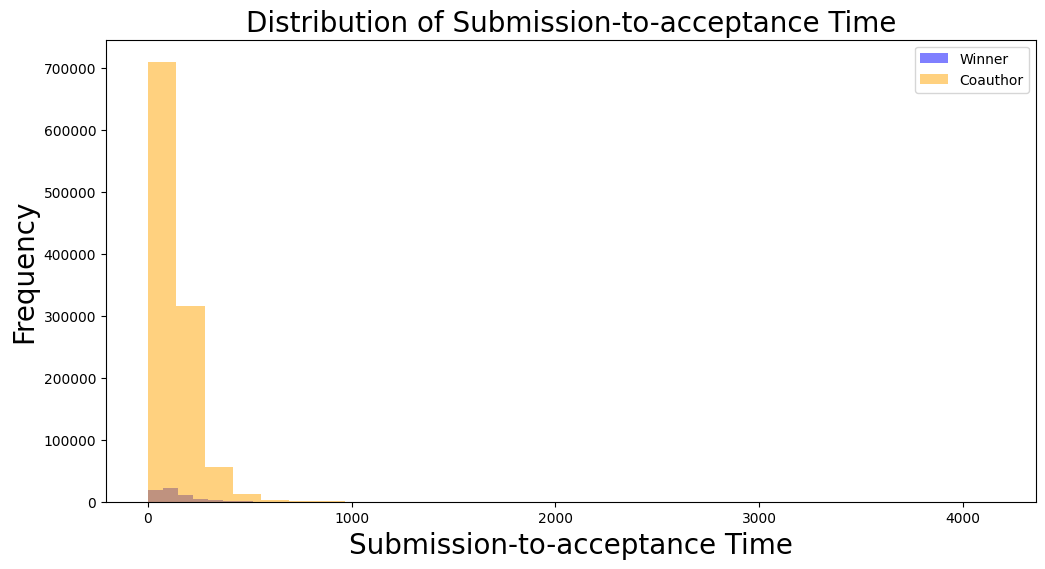

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
filtered_data = df
winners_filtered = filtered_data[filtered_data['if_winner'] == 1]
coauthors_filtered = filtered_data[filtered_data['if_winner'] == 0]

plt.figure(figsize=(12, 6))
plt.hist(winners_filtered['DeltaDays'], bins=30, alpha=0.5, label='Winner', color='blue')
plt.hist(coauthors_filtered['DeltaDays'], bins=30, alpha=0.5, label='Coauthor', color='orange')
plt.xlabel('Submission-to-acceptance Time', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Distribution of Submission-to-acceptance Time', fontsize=20) 
plt.legend()
plt.show() 

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/home/ls2543/python_packages')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tqdm import tqdm

df = pd.read_csv('final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv', low_memory = False)
df = df[(df['DeltaDays'] > 0) & (df['DeltaDays'] <= 10000)].copy()


df['is_nature_index'] = df['is_nature_index'].fillna(2).astype('category')
df['JournalISSN'] = df['JournalISSN'].fillna("Unknown")
df['author_position'] = pd.Categorical(df['author_position'], categories=["first", "middle", "last"])
df['field'] = df['field'].astype('category')
df['is_top5'] = df['is_top5'].astype('category')
df['year_diff'] = abs(df['PubYear'] - df['awardYear'])

df_nature = df[df['is_nature_index'] == 1].copy()

df_nature['is_nature_index'] = df_nature['is_nature_index'].astype('category')  # 新增
df_nature['before_or_after'] = df_nature['before_or_after'].astype('category')  # 新增

df_nature['is_nature_index'] = df_nature['is_nature_index'].cat.remove_unused_categories()
df_nature['before_or_after'] = df_nature['before_or_after'].cat.remove_unused_categories()
#df_nature

#### ln transformation

In [2]:
df_nature['log_DeltaDays'] = np.log(df_nature['DeltaDays'])

In [3]:
base_var = 'log_DeltaDays ~ C(if_winner) * C(before_or_after) + C(is_top5)'

model_specs_nature = [
    {'formula': base_var},
    {'formula': base_var + '+ year_diff'},
    {'formula': base_var + '+ teamsize'},
    {'formula': base_var + '+ teamsize + year_diff'},
    {'formula': base_var + '+ JIF'},
    {'formula': base_var + '+ JIF + ref_num'},
    {'formula': base_var + '+ academic_experience'},
    {'formula': base_var + '+ cited_by_count'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(JournalISSN)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(field) + C(JournalISSN)'}
]


def fit_nature_model(spec):
    try:
        model = ols(
            formula=spec['formula'],
            data=df_nature
        ).fit(
            cov_type='cluster',
            cov_kwds={'groups': df_nature['group_id']},
            method='pinv'
        )
        return model
    except Exception as e:
        print(f"Model failed: {spec['formula']}\nError: {str(e)}")
        return None

# Run all models
print("Fitting Nature subsample models...")
nature_models = []
for spec in tqdm(model_specs_nature):
    nature_models.append(fit_nature_model(spec))

# Results table configuration
covariates_nature = [
    'Intercept',
    'C(if_winner)[T.1]',
    'C(before_or_after)[T.1]',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]',
    'C(is_top5)[T.1]',
    'year_diff',
    'teamsize',
    'JIF',
    'ref_num',
    'academic_experience',
    'cited_by_count'
]

cov_display_names_nature = {
    'Intercept': 'Intercept',
    'C(if_winner)[T.1]': 'Winner Status',
    'C(before_or_after)[T.1]': 'After Award',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]': 'Winner × After Award',
    'C(is_top5)[T.1]': 'Top5 Prize',
    'year_diff': 'Year Difference',
    'teamsize': 'Team Size',
    'JIF': 'Journal Impact Factor',
    'ref_num': 'References',
    'academic_experience': 'Experience',
    'cited_by_count': 'Citations'
}

fixed_effects_nature = [
    'Author Position',
    'Journal FE', 
    'Field FE',
    'Year FE'
]


# Generate results table
results = []
for i, model in enumerate(nature_models):
    if not model:
        continue
    
    res = {
        'Model': f'Model {i+1}',
        'N': f"{model.nobs:,.0f}",
        'R²': f"{model.rsquared:.3f}"
    }
    
    # Add coefficients
    for cov in covariates_nature:
        if cov in model.params:
            coef = model.params[cov]
            pval = model.pvalues[cov]
            se = model.bse[cov]
            star = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
            res[cov_display_names_nature[cov]] = f"{coef:.3f}{star} ({se:.3f})"
        else:
            res[cov_display_names_nature.get(cov, cov)] = ''
    
    # Add fixed effects indicators
    formula = model.model.formula
    res.update({
        'Author Position': 'Yes' if 'C(author_position)' in formula else 'No',
        'Journal FE': 'Yes' if 'C(JournalISSN)' in formula else 'No',
        'Field FE': 'Yes' if 'C(field)' in formula else 'No',
        'Year FE': 'Yes' if 'C(PubYear)' in formula else 'No'
    })
    
    results.append(res)


    
# Create final table
final_table = pd.DataFrame(results).set_index('Model').T
final_table = final_table.reindex(list(cov_display_names_nature.values()) + fixed_effects_nature + ['N', 'R²'])
final_table

Fitting Nature subsample models...


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:47<00:00,  3.18s/it]


Model,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15
Intercept,4.726*** (0.009),4.736*** (0.011),4.664*** (0.012),4.671*** (0.014),4.702*** (0.013),4.512*** (0.013),4.739*** (0.010),4.752*** (0.010),4.494*** (0.016),4.510*** (0.017),4.228*** (0.022),4.711*** (0.019),3.825*** (0.024),4.418*** (0.021),3.892*** (0.025)
Winner Status,-0.097*** (0.019),-0.097*** (0.019),-0.074*** (0.019),-0.074*** (0.019),-0.102*** (0.019),-0.101*** (0.019),-0.093*** (0.019),-0.083*** (0.018),-0.077*** (0.019),-0.056** (0.018),-0.056** (0.018),-0.063*** (0.018),-0.078*** (0.017),-0.063*** (0.018),-0.073*** (0.017)
After Award,0.195*** (0.009),0.203*** (0.009),0.198*** (0.009),0.203*** (0.009),0.197*** (0.010),0.168*** (0.010),0.200*** (0.009),0.178*** (0.009),0.179*** (0.009),0.156*** (0.009),0.148*** (0.009),0.151*** (0.010),0.130*** (0.008),0.144*** (0.010),0.128*** (0.008)
Winner × After Award,0.033 (0.022),0.046* (0.022),0.028 (0.021),0.036 (0.021),0.032 (0.022),0.030 (0.021),0.034 (0.022),0.027 (0.021),0.033 (0.021),0.023 (0.020),0.023 (0.020),0.023 (0.021),-0.015 (0.019),0.023 (0.020),-0.019 (0.018)
Top5 Prize,0.058*** (0.017),0.055*** (0.016),0.049** (0.016),0.047** (0.016),0.058*** (0.017),0.057*** (0.016),0.058*** (0.017),0.056*** (0.017),0.048*** (0.014),0.045** (0.014),0.045** (0.014),0.049*** (0.014),0.037*** (0.009),0.049*** (0.014),0.037*** (0.008)
Year Difference,,-0.002* (0.001),,-0.001 (0.001),,,,,-0.001 (0.001),-0.001 (0.001),-0.001 (0.001),-0.001 (0.001),0.000 (0.001),-0.001 (0.001),0.001 (0.001)
Team Size,,,0.003*** (0.000),0.003*** (0.000),,,,,0.002*** (0.000),0.003*** (0.000),0.002*** (0.000),0.003*** (0.000),0.003*** (0.000),0.002*** (0.000),0.002*** (0.000)
Journal Impact Factor,,,,,0.001* (0.000),0.001** (0.000),,,0.001* (0.000),0.002*** (0.000),0.002*** (0.000),0.002*** (0.000),0.017*** (0.001),0.002*** (0.000),0.018*** (0.001)
References,,,,,,0.004*** (0.000),,,0.004*** (0.000),0.004*** (0.000),0.004*** (0.000),0.004*** (0.000),0.002*** (0.000),0.004*** (0.000),0.002*** (0.000)
Experience,,,,,,,-0.001** (0.000),,-0.000* (0.000),-0.001** (0.000),-0.001*** (0.000),-0.001** (0.000),-0.000 (0.000),-0.001*** (0.000),-0.000 (0.000)


In [5]:
final_table.to_csv('Revision_Table2.csv')

In [5]:
# 筛选目标期刊（包括印刷版和在线ISSN）
target_issns = {'0028-0836', '1476-4687',  # Nature
                '0036-8075', '1095-9203',  # Science
                '0027-8424', '1091-6490'}  # PNAS

df_target = df[df['JournalISSN'].isin(target_issns)].copy()

df_target['before_or_after'] = df_target['before_or_after'].astype('category')
df_target['is_top5'] = df_target['is_top5'].astype('category')
df_target['author_position'] = pd.Categorical(df_target['author_position'], 
                                           categories=["first", "middle", "last"])

df_target = df_target.apply(lambda x: x.cat.remove_unused_categories() 
                          if pd.api.types.is_categorical_dtype(x) else x)

df_target['log_DeltaDays'] = np.log(df_target['DeltaDays'])

base_var = 'log_DeltaDays ~ C(if_winner) * C(before_or_after) + C(is_top5)'

# 更新模型设定（移除JournalISSN FE）
model_specs_target = [
    {'formula': base_var},
    {'formula': base_var + '+ year_diff'},
    {'formula': base_var + '+ teamsize'},
    {'formula': base_var + '+ teamsize + year_diff'},
    {'formula': base_var + '+ JIF'},
    {'formula': base_var + '+ JIF + ref_num'},
    {'formula': base_var + '+ academic_experience'},
    {'formula': base_var + '+ cited_by_count'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(JournalISSN)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(field) + C(PubYear)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(PubYear) + C(group_id)'}
]

def fit_target_model(spec):
    try:
        model = ols(
            formula=spec['formula'],
            data=df_target
        ).fit(
            cov_type='cluster',
            cov_kwds={'groups': df_target['group_id']},
            method='pinv'
        )
        return model
    except Exception as e:
        print(f"Model failed: {spec['formula']}\nError: {str(e)}")
        return None

# 运行所有模型
print("Fitting Target Journal models...")
target_models = []
for spec in tqdm(model_specs_target):
    target_models.append(fit_target_model(spec))


# Results table configuration
covariates_target = [
    'Intercept',
    'C(if_winner)[T.1]',
    'C(before_or_after)[T.1]',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]',
    'C(is_top5)[T.1]',
    'year_diff',
    'teamsize',
    'JIF',
    'ref_num',
    'academic_experience',
    'cited_by_count'
]

cov_display_names_target = {
    'Intercept': 'Intercept',
    'C(if_winner)[T.1]': 'Winner Status',
    'C(before_or_after)[T.1]': 'After Award',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]': 'Winner × After Award',
    'C(is_top5)[T.1]': 'Top5 Prize',
    'year_diff': 'Year Difference',
    'teamsize': 'Team Size',
    'JIF': 'Journal Impact Factor',
    'ref_num': 'References',
    'academic_experience': 'Experience',
    'cited_by_count': 'Citations'
}

# 固定效应标识
fixed_effects_target = [
    'Author Position',
    'Journal FE', 
    'Field FE',
    'Group FE',
    'Year FE'
]



## 生成结果表格的修正代码
results_target = []
for i, model in enumerate(target_models):
    if not model:
        continue
    
    res = {
        'Model': f'Target Model {i+1}',
        'N': f"{model.nobs:,.0f}",
        'R²': f"{model.rsquared:.3f}"
    }
    
    # 提取系数和标准误（修正参数名匹配）
    for cov in covariates_target:
        # 直接使用cov名称，无需替换下划线
        if cov in model.params:
            coef = model.params[cov]
            pval = model.pvalues.get(cov, 1)
            se = model.bse.get(cov, np.nan)
            star = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
            res[cov_display_names_target[cov]] = f"{coef:.3f}{star} ({se:.3f})"
        else:
            res[cov_display_names_target.get(cov, cov)] = ''
    
    # 固定效应标识（保持不变）
    formula = model.model.formula
    res.update({
        'Author Position': 'Yes' if 'C(author_position)' in formula else 'No',
        'Journal FE': 'Yes' if 'C(JournalISSN)' in formula else 'No',
        'Field FE': 'Yes' if 'C(field)' in formula else 'No',
        'Group FE': 'Yes' if 'C(group_id)' in formula else 'No',
        'Year FE': 'Yes' if 'C(PubYear)' in formula else 'No'
    })
    
    results_target.append(res)

# 创建最终表格
final_table_target = pd.DataFrame(results_target).set_index('Model').T
final_table_target = final_table_target.reindex(
    list(cov_display_names_target.values()) + 
    fixed_effects_target + 
    ['N', 'R²']
)

# 优化显示格式
final_table_target.style.format({
    'N': '{:,}',
    'R²': '{:.3f}'
})

final_table_target


Fitting Target Journal models...


100%|██████████| 16/16 [00:10<00:00,  1.57it/s]


Model,Target Model 1,Target Model 2,Target Model 3,Target Model 4,Target Model 5,Target Model 6,Target Model 7,Target Model 8,Target Model 9,Target Model 10,Target Model 11,Target Model 12,Target Model 13,Target Model 14,Target Model 15,Target Model 16
Intercept,4.733*** (0.025),4.754*** (0.032),4.649*** (0.020),4.668*** (0.026),4.032*** (0.194),3.528*** (0.199),4.695*** (0.028),4.800*** (0.028),3.534*** (0.200),3.442*** (0.203),3.336*** (0.206),3.450*** (0.213),1.811*** (0.058),3.362*** (0.217),2.625*** (0.268),2.543*** (0.244)
Winner Status,-0.238*** (0.033),-0.240*** (0.033),-0.198*** (0.032),-0.200*** (0.032),-0.240*** (0.033),-0.226*** (0.033),-0.256*** (0.033),-0.223*** (0.033),-0.228*** (0.033),-0.199*** (0.033),-0.188*** (0.033),-0.179*** (0.032),-0.188*** (0.033),-0.164*** (0.032),-0.089** (0.031),-0.077* (0.030)
After Award,0.352*** (0.021),0.367*** (0.021),0.364*** (0.020),0.375*** (0.021),0.371*** (0.022),0.333*** (0.022),0.336*** (0.021),0.313*** (0.023),0.339*** (0.022),0.299*** (0.023),0.296*** (0.023),0.294*** (0.021),0.290*** (0.024),0.292*** (0.021),-0.031 (0.023),-0.076* (0.033)
Winner × After Award,0.040 (0.038),0.064 (0.039),0.025 (0.038),0.045 (0.038),0.037 (0.038),0.039 (0.038),0.039 (0.038),0.035 (0.038),0.053 (0.038),0.044 (0.038),0.040 (0.037),0.019 (0.037),0.034 (0.037),0.015 (0.036),0.017 (0.035),0.027 (0.036)
Top5 Prize,0.130** (0.040),0.127** (0.040),0.124*** (0.036),0.121*** (0.036),0.132** (0.040),0.121** (0.038),0.131** (0.040),0.130** (0.043),0.116** (0.036),0.115** (0.038),0.113** (0.038),0.087** (0.027),0.113** (0.037),0.085** (0.027),0.028 (0.023),0.057 (0.093)
Year Difference,,-0.005* (0.002),,-0.004 (0.002),,,,,-0.005* (0.002),-0.005* (0.002),-0.005* (0.002),-0.005* (0.002),-0.004* (0.002),-0.005* (0.002),-0.001 (0.002),-0.003 (0.003)
Team Size,,,0.003*** (0.001),0.003*** (0.001),,,,,0.002*** (0.000),0.002*** (0.001),0.002*** (0.001),0.002*** (0.000),0.002*** (0.001),0.002*** (0.000),0.001** (0.000),0.001*** (0.000)
Journal Impact Factor,,,,,0.014*** (0.004),0.021*** (0.004),,,0.019*** (0.004),0.023*** (0.004),0.023*** (0.004),0.024*** (0.004),0.049*** (0.001),0.024*** (0.004),0.052*** (0.005),0.049*** (0.004)
References,,,,,,0.004*** (0.001),,,0.004*** (0.000),0.004*** (0.000),0.004*** (0.000),0.004*** (0.000),0.004*** (0.000),0.004*** (0.000),0.001*** (0.000),0.001** (0.000)
Experience,,,,,,,0.002*** (0.000),,0.003*** (0.000),0.002*** (0.000),0.002*** (0.000),0.002*** (0.000),0.002*** (0.000),0.002*** (0.000),0.000 (0.000),0.000 (0.000)


In [6]:
final_table_target.to_csv('Revision_NSP_interaction_results.csv')

In [7]:
target_issns = {
    # Lancet
    '0028-0836', '1476-4687',  # 印刷版和电子版ISSN
    # JAMA
    '0098-7484', '1538-3598',  
    # NEJM
    '0028-4793', '1533-4406',  
    # BMJ
    '0959-8138', '1756-1833'    
}
df_target = df[df['JournalISSN'].isin(target_issns)].copy()

df_target['before_or_after'] = df_target['before_or_after'].astype('category')
df_target['is_top5'] = df_target['is_top5'].astype('category')
df_target['author_position'] = pd.Categorical(df_target['author_position'], 
                                           categories=["first", "middle", "last"])

df_target = df_target.apply(lambda x: x.cat.remove_unused_categories() 
                          if pd.api.types.is_categorical_dtype(x) else x)

df_target['log_DeltaDays'] = np.log(df_target['DeltaDays'])

base_var = 'log_DeltaDays ~ C(if_winner) * C(before_or_after) + C(is_top5)'


# 更新模型设定（移除JournalISSN FE）
model_specs_target = [
    {'formula': base_var},
    {'formula': base_var + '+ year_diff'},
    {'formula': base_var + '+ teamsize'},
    {'formula': base_var + '+ teamsize + year_diff'},
    {'formula': base_var + '+ JIF'},
    {'formula': base_var + '+ JIF + ref_num'},
    {'formula': base_var + '+ academic_experience'},
    {'formula': base_var + '+ cited_by_count'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(JournalISSN)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(field) + C(PubYear)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + cited_by_count + C(author_position) + C(PubYear) + C(group_id)'}
]

def fit_target_model(spec):
    try:
        model = ols(
            formula=spec['formula'],
            data=df_target
        ).fit(
            cov_type='cluster',
            cov_kwds={'groups': df_target['group_id']},
            method='pinv'
        )
        return model
    except Exception as e:
        print(f"Model failed: {spec['formula']}\nError: {str(e)}")
        return None

# 运行所有模型
print("Fitting Target Journal models...")
target_models = []
for spec in tqdm(model_specs_target):
    target_models.append(fit_target_model(spec))

# Results table configuration
covariates_target = [
    'Intercept',
    'C(if_winner)[T.1]',
    'C(before_or_after)[T.1]',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]',
    'C(is_top5)[T.1]',
    'year_diff',
    'teamsize',
    'JIF',
    'ref_num',
    'academic_experience',
    'cited_by_count'
]

cov_display_names_target = {
    'Intercept': 'Intercept',
    'C(if_winner)[T.1]': 'Winner Status',
    'C(before_or_after)[T.1]': 'After Award',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]': 'Winner × After Award',
    'C(is_top5)[T.1]': 'Top5 Prize',
    'year_diff': 'Year Difference',
    'teamsize': 'Team Size',
    'JIF': 'Journal Impact Factor',
    'ref_num': 'References',
    'academic_experience': 'Experience',
    'cited_by_count': 'Citations'
}

# 固定效应标识
fixed_effects_target = [
    'Author Position',
    'Journal FE',
    'Field FE',
    'Group FE',
    'Year FE'
]


## 生成结果表格的修正代码
results_target = []
for i, model in enumerate(target_models):
    if not model:
        continue
    
    res = {
        'Model': f'Target Model {i+1}',
        'N': f"{model.nobs:,.0f}",
        'R²': f"{model.rsquared:.3f}"
    }
    
    # 提取系数和标准误（修正参数名匹配）
    for cov in covariates_target:
        # 直接使用cov名称，无需替换下划线
        if cov in model.params:
            coef = model.params[cov]
            pval = model.pvalues.get(cov, 1)
            se = model.bse.get(cov, np.nan)
            star = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
            res[cov_display_names_target[cov]] = f"{coef:.3f}{star} ({se:.3f})"
        else:
            res[cov_display_names_target.get(cov, cov)] = ''
    
    # 固定效应标识（保持不变）
    formula = model.model.formula
    res.update({
        'Author Position': 'Yes' if 'C(author_position)' in formula else 'No',
        'Journal FE': 'Yes' if 'C(JournalISSN)' in formula else 'No',
        'Field FE': 'Yes' if 'C(field)' in formula else 'No',
        'Group FE': 'Yes' if 'C(group_id)' in formula else 'No',
        'Year FE': 'Yes' if 'C(PubYear)' in formula else 'No'
    })
    
    results_target.append(res)
# 创建最终表格
final_table_target = pd.DataFrame(results_target).set_index('Model').T
final_table_target = final_table_target.reindex(
    list(cov_display_names_target.values()) + 
    fixed_effects_target + 
    ['N', 'R²']
)

# 优化显示格式
final_table_target.style.format({
    'N': '{:,}',
    'R²': '{:.3f}'
})

final_table_target


Fitting Target Journal models...


100%|██████████| 16/16 [00:07<00:00,  2.03it/s]


Model,Target Model 1,Target Model 2,Target Model 3,Target Model 4,Target Model 5,Target Model 6,Target Model 7,Target Model 8,Target Model 9,Target Model 10,Target Model 11,Target Model 12,Target Model 13,Target Model 14,Target Model 15,Target Model 16
Intercept,4.735*** (0.025),4.766*** (0.035),4.636*** (0.022),4.664*** (0.030),0.002*** (0.000),0.002*** (0.000),4.689*** (0.029),4.796*** (0.030),0.002*** (0.000),0.002*** (0.000),0.002*** (0.000),0.002*** (0.000),0.002*** (0.000),0.002*** (0.000),0.002*** (0.000),0.002*** (0.000)
Winner Status,-0.244*** (0.034),-0.247*** (0.034),-0.195*** (0.033),-0.198*** (0.033),-0.244*** (0.034),-0.230*** (0.034),-0.267*** (0.035),-0.231*** (0.034),-0.228*** (0.034),-0.201*** (0.035),-0.191*** (0.035),-0.183*** (0.034),-0.190*** (0.034),-0.167*** (0.034),-0.096** (0.033),-0.087** (0.032)
After Award,0.382*** (0.023),0.401*** (0.023),0.393*** (0.023),0.408*** (0.024),0.382*** (0.023),0.338*** (0.023),0.363*** (0.023),0.350*** (0.024),0.351*** (0.023),0.312*** (0.025),0.308*** (0.025),0.302*** (0.022),0.300*** (0.024),0.300*** (0.022),-0.045* (0.020),-0.089** (0.032)
Winner × After Award,0.014 (0.041),0.046 (0.041),-0.003 (0.041),0.023 (0.041),0.014 (0.041),0.016 (0.041),0.014 (0.041),0.011 (0.041),0.037 (0.040),0.031 (0.040),0.028 (0.039),0.013 (0.038),0.022 (0.039),0.009 (0.038),0.038 (0.036),0.042 (0.037)
Top5 Prize,0.130** (0.045),0.127** (0.045),0.122** (0.040),0.120** (0.039),0.130** (0.045),0.119** (0.042),0.131** (0.045),0.131** (0.048),0.114** (0.039),0.114** (0.040),0.112** (0.040),0.081** (0.029),0.111** (0.040),0.078** (0.029),0.015 (0.024),0.039 (0.103)
Year Difference,,-0.007* (0.003),,-0.005 (0.003),,,,,-0.007* (0.003),-0.007** (0.003),-0.007* (0.003),-0.007** (0.002),-0.006* (0.003),-0.007** (0.002),-0.002 (0.002),-0.004 (0.003)
Team Size,,,0.003*** (0.000),0.003*** (0.000),,,,,0.002*** (0.000),0.003*** (0.001),0.003*** (0.001),0.003*** (0.000),0.003*** (0.001),0.002*** (0.000),0.001*** (0.000),0.001*** (0.000)
Journal Impact Factor,,,,,0.094*** (0.001),0.090*** (0.001),,,0.089*** (0.001),0.090*** (0.001),0.088*** (0.001),0.092*** (0.001),0.084*** (0.001),0.091*** (0.001),0.106*** (0.002),0.100*** (0.002)
References,,,,,,0.005*** (0.001),,,0.004*** (0.001),0.004*** (0.001),0.004*** (0.001),0.004*** (0.000),0.004*** (0.001),0.004*** (0.000),0.001 (0.000),0.000 (0.000)
Experience,,,,,,,0.002*** (0.001),,0.003*** (0.000),0.003*** (0.000),0.003*** (0.000),0.002*** (0.000),0.003*** (0.000),0.002*** (0.000),0.000 (0.000),0.000 (0.000)


In [8]:
final_table_target.to_csv('Revision_BioMed_interaction_results.csv')

## Then only remove citation (still using $\Delta$T) in the FE regression to get Table S8, S9, and S10. From them can we select the five specified models to update the original Table 2, 3, and 4

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/home/ls2543/python_packages')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tqdm import tqdm

df = pd.read_csv('C:/Users/86156/Desktop/NTJY/final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv')
df = df[(df['DeltaDays'] > 0) & (df['DeltaDays'] <= 10000)].copy()


df['is_nature_index'] = df['is_nature_index'].fillna(2).astype('category')
df['JournalISSN'] = df['JournalISSN'].fillna("Unknown")
df['author_position'] = pd.Categorical(df['author_position'], categories=["first", "middle", "last"])
df['field'] = df['field'].astype('category')
df['is_top5'] = df['is_top5'].astype('category')
df['year_diff'] = abs(df['PubYear'] - df['awardYear'])

df_nature = df[df['is_nature_index'] == 1].copy()

df_nature['is_nature_index'] = df_nature['is_nature_index'].astype('category')  # 新增
df_nature['before_or_after'] = df_nature['before_or_after'].astype('category')  # 新增

df_nature['is_nature_index'] = df_nature['is_nature_index'].cat.remove_unused_categories()
df_nature['before_or_after'] = df_nature['before_or_after'].cat.remove_unused_categories()
#df_nature

base_var = 'DeltaDays ~ C(if_winner) * C(before_or_after) + C(is_top5)'

model_specs_nature = [
    {'formula': base_var},
    {'formula': base_var + '+ year_diff'},
    {'formula': base_var + '+ teamsize'},
    {'formula': base_var + '+ teamsize + year_diff'},
    {'formula': base_var + '+ JIF'},
    {'formula': base_var + '+ JIF + ref_num'},
    {'formula': base_var + '+ academic_experience'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(JournalISSN)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position) + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position) + C(field) + C(JournalISSN)'}
]


def fit_nature_model(spec):
    try:
        model = ols(
            formula=spec['formula'],
            data=df_nature
        ).fit(
            cov_type='cluster',
            cov_kwds={'groups': df_nature['group_id']},
            method='pinv'
        )
        return model
    except Exception as e:
        print(f"Model failed: {spec['formula']}\nError: {str(e)}")
        return None

# Run all models
print("Fitting Nature subsample models...")
nature_models = []
for spec in tqdm(model_specs_nature):
    nature_models.append(fit_nature_model(spec))

# Results table configuration
covariates_nature = [
    'Intercept',
    'C(if_winner)[T.1]',
    'C(before_or_after)[T.1]',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]',
    'C(is_top5)[T.1]',
    'year_diff',
    'teamsize',
    'JIF',
    'ref_num',
    'academic_experience']

cov_display_names_nature = {
    'Intercept': 'Intercept',
    'C(if_winner)[T.1]': 'Winner Status',
    'C(before_or_after)[T.1]': 'After Award',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]': 'Winner × After Award',
    'C(is_top5)[T.1]': 'Top5 Prize',
    'year_diff': 'Year Difference',
    'teamsize': 'Team Size',
    'JIF': 'Journal Impact Factor',
    'ref_num': 'References',
    'academic_experience': 'Experience'}

fixed_effects_nature = [
    'Author Position',
    'Journal FE', 
    'Field FE',
    'Year FE'
]


# Generate results table
results = []
for i, model in enumerate(nature_models):
    if not model:
        continue
    
    res = {
        'Model': f'Model {i+1}',
        'N': f"{model.nobs:,.0f}",
        'R²': f"{model.rsquared:.3f}"
    }
    
    # Add coefficients
    for cov in covariates_nature:
        if cov in model.params:
            coef = model.params[cov]
            pval = model.pvalues[cov]
            se = model.bse[cov]
            star = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
            res[cov_display_names_nature[cov]] = f"{coef:.3f}{star} ({se:.3f})"
        else:
            res[cov_display_names_nature.get(cov, cov)] = ''
    
    # Add fixed effects indicators
    formula = model.model.formula
    res.update({
        'Author Position': 'Yes' if 'C(author_position)' in formula else 'No',
        'Journal FE': 'Yes' if 'C(JournalISSN)' in formula else 'No',
        'Field FE': 'Yes' if 'C(field)' in formula else 'No',
        'Year FE': 'Yes' if 'C(PubYear)' in formula else 'No'
    })
    
    results.append(res)


    
# Create final table
final_table = pd.DataFrame(results).set_index('Model').T
final_table = final_table.reindex(list(cov_display_names_nature.values()) + fixed_effects_nature + ['N', 'R²'])
final_table

C:\Users\86156\AppData\Local\Temp\ipykernel_17072\1103000572.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/86156/Desktop/NTJY/final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv')


Fitting Nature subsample models...


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:45<00:00,  3.48s/it]


Model,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13
Intercept,138.266*** (1.397),138.763*** (1.803),130.451*** (1.751),130.464*** (2.121),127.384*** (1.734),102.236*** (1.909),138.974*** (1.583),98.714*** (2.262),74.719*** (2.483),112.016*** (2.579),27.539*** (2.370),87.170*** (2.807),37.687*** (2.379)
Winner Status,-10.729*** (2.440),-10.733*** (2.441),-7.792*** (2.365),-7.793*** (2.365),-12.839*** (2.473),-12.730*** (2.416),-10.493*** (2.502),-10.314*** (2.403),-9.822*** (2.377),-10.851*** (2.383),-11.918*** (2.182),-10.278*** (2.370),-10.795*** (2.149)
After Award,35.855*** (1.437),36.272*** (1.487),36.235*** (1.391),36.244*** (1.434),36.866*** (1.513),33.064*** (1.496),36.131*** (1.433),33.384*** (1.441),32.733*** (1.446),33.545*** (1.536),29.108*** (1.536),32.907*** (1.542),29.361*** (1.511)
Winner × After Award,0.333 (3.127),0.954 (3.146),-0.283 (3.033),-0.268 (3.031),0.010 (3.169),-0.348 (3.065),0.409 (3.115),-0.875 (2.992),-1.080 (2.966),-1.082 (2.999),-5.498* (2.660),-1.313 (2.977),-6.446* (2.608)
Top5 Prize,8.606*** (2.532),8.463*** (2.527),7.539** (2.625),7.536** (2.652),8.715*** (2.499),8.570*** (2.417),8.605*** (2.528),7.819*** (2.328),7.781*** (2.302),8.246*** (2.326),6.585*** (1.649),8.236*** (2.311),6.320*** (1.572)
Year Difference,,-0.116 (0.152),,-0.003 (0.147),,,,0.027 (0.138),0.043 (0.136),-0.007 (0.136),0.205 (0.113),0.009 (0.134),0.221* (0.108)
Team Size,,,0.368*** (0.035),0.368*** (0.035),,,,0.269*** (0.036),0.215*** (0.038),0.307*** (0.031),0.311*** (0.024),0.252*** (0.033),0.227*** (0.020)
Journal Impact Factor,,,,,0.473*** (0.047),0.514*** (0.047),,0.466*** (0.049),0.473*** (0.049),0.469*** (0.048),1.955*** (0.072),0.475*** (0.048),2.078*** (0.075)
References,,,,,,0.533*** (0.027),,0.511*** (0.026),0.513*** (0.026),0.500*** (0.026),0.313*** (0.021),0.502*** (0.025),0.305*** (0.021)
Experience,,,,,,,-0.034 (0.027),-0.010 (0.026),-0.025 (0.026),-0.007 (0.025),0.041* (0.020),-0.021 (0.025),0.030 (0.020)


In [2]:
final_table.to_csv('TableS8.csv')

In [3]:
# 筛选目标期刊（包括印刷版和在线ISSN）
target_issns = {'0028-0836', '1476-4687',  # Nature
                '0036-8075', '1095-9203',  # Science
                '0027-8424', '1091-6490'}  # PNAS

df_target = df[df['JournalISSN'].isin(target_issns)].copy()

df_target['before_or_after'] = df_target['before_or_after'].astype('category')
df_target['is_top5'] = df_target['is_top5'].astype('category')
df_target['author_position'] = pd.Categorical(df_target['author_position'], 
                                           categories=["first", "middle", "last"])

df_target = df_target.apply(lambda x: x.cat.remove_unused_categories() 
                          if pd.api.types.is_categorical_dtype(x) else x)

base_var = 'DeltaDays ~ C(if_winner) * C(before_or_after) + C(is_top5)'

# 更新模型设定（移除JournalISSN FE）
model_specs_target = [
    {'formula': base_var},
    {'formula': base_var + '+ year_diff'},
    {'formula': base_var + '+ teamsize'},
    {'formula': base_var + '+ teamsize + year_diff'},
    {'formula': base_var + '+ JIF'},
    {'formula': base_var + '+ JIF + ref_num'},
    {'formula': base_var + '+ academic_experience'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(JournalISSN)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position) + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position) + C(field) + C(PubYear)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position) + C(PubYear) + C(group_id)'}
]

def fit_target_model(spec):
    try:
        model = ols(
            formula=spec['formula'],
            data=df_target
        ).fit(
            cov_type='cluster',
            cov_kwds={'groups': df_target['group_id']},
            method='pinv'
        )
        return model
    except Exception as e:
        print(f"Model failed: {spec['formula']}\nError: {str(e)}")
        return None

# 运行所有模型
print("Fitting Target Journal models...")
target_models = []
for spec in tqdm(model_specs_target):
    target_models.append(fit_target_model(spec))


# Results table configuration
covariates_target = [
    'Intercept',
    'C(if_winner)[T.1]',
    'C(before_or_after)[T.1]',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]',
    'C(is_top5)[T.1]',
    'year_diff',
    'teamsize',
    'JIF',
    'ref_num',
    'academic_experience',
    'cited_by_count'
]

cov_display_names_target = {
    'Intercept': 'Intercept',
    'C(if_winner)[T.1]': 'Winner Status',
    'C(before_or_after)[T.1]': 'After Award',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]': 'Winner × After Award',
    'C(is_top5)[T.1]': 'Top5 Prize',
    'year_diff': 'Year Difference',
    'teamsize': 'Team Size',
    'JIF': 'Journal Impact Factor',
    'ref_num': 'References',
    'academic_experience': 'Experience',
    'cited_by_count': 'Citations'
}

# 固定效应标识
fixed_effects_target = [
    'Author Position',
    'Journal FE', 
    'Field FE',
    'Group FE',
    'Year FE'
]



## 生成结果表格的修正代码
results_target = []
for i, model in enumerate(target_models):
    if not model:
        continue
    
    res = {
        'Model': f'Target Model {i+1}',
        'N': f"{model.nobs:,.0f}",
        'R²': f"{model.rsquared:.3f}"
    }
    
    # 提取系数和标准误（修正参数名匹配）
    for cov in covariates_target:
        # 直接使用cov名称，无需替换下划线
        if cov in model.params:
            coef = model.params[cov]
            pval = model.pvalues.get(cov, 1)
            se = model.bse.get(cov, np.nan)
            star = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
            res[cov_display_names_target[cov]] = f"{coef:.3f}{star} ({se:.3f})"
        else:
            res[cov_display_names_target.get(cov, cov)] = ''
    
    # 固定效应标识（保持不变）
    formula = model.model.formula
    res.update({
        'Author Position': 'Yes' if 'C(author_position)' in formula else 'No',
        'Journal FE': 'Yes' if 'C(JournalISSN)' in formula else 'No',
        'Field FE': 'Yes' if 'C(field)' in formula else 'No',
        'Group FE': 'Yes' if 'C(group_id)' in formula else 'No',
        'Year FE': 'Yes' if 'C(PubYear)' in formula else 'No'
    })
    
    results_target.append(res)

# 创建最终表格
final_table_target = pd.DataFrame(results_target).set_index('Model').T
final_table_target = final_table_target.reindex(
    list(cov_display_names_target.values()) + 
    fixed_effects_target + 
    ['N', 'R²']
)

# 优化显示格式
final_table_target.style.format({
    'N': '{:,}',
    'R²': '{:.3f}'
})

final_table_target

C:\Users\86156\AppData\Local\Temp\ipykernel_17072\2279956844.py:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(x) else x)


Fitting Target Journal models...


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:17<00:00,  1.26s/it]


Model,Target Model 1,Target Model 2,Target Model 3,Target Model 4,Target Model 5,Target Model 6,Target Model 7,Target Model 8,Target Model 9,Target Model 10,Target Model 11,Target Model 12,Target Model 13,Target Model 14
Intercept,140.940*** (3.965),143.677*** (5.211),125.756*** (3.565),127.936*** (4.632),-48.623 (31.532),-136.293*** (34.451),134.456*** (4.531),-136.006*** (32.896),-156.087*** (33.492),-118.756*** (33.141),21.224** (7.666),-135.245*** (33.894),-340.584*** (46.187),-355.976*** (43.623)
Winner Status,-29.907*** (4.704),-30.106*** (4.736),-22.595*** (4.407),-22.828*** (4.431),-30.489*** (4.678),-28.038*** (4.593),-32.979*** (4.741),-27.969*** (4.563),-25.716*** (4.604),-25.748*** (4.552),-26.219*** (4.437),-22.883*** (4.577),-10.436* (4.471),-5.989 (4.403)
After Award,65.619*** (3.665),67.485*** (3.786),67.709*** (3.711),69.048*** (3.912),70.784*** (3.950),64.051*** (3.902),62.831*** (3.672),64.610*** (4.125),64.045*** (4.127),65.430*** (3.938),63.337*** (4.190),65.021*** (3.938),-2.246 (3.553),-10.961* (5.265)
Winner × After Award,-4.034 (6.013),-0.972 (6.305),-6.691 (5.950),-4.422 (6.120),-4.677 (5.994),-4.351 (5.983),-4.170 (5.992),-3.191 (6.034),-3.902 (5.967),-7.265 (5.876),-4.778 (5.955),-8.165 (5.781),-1.884 (5.618),-2.049 (5.998)
Top5 Prize,19.922** (7.414),19.496** (7.323),18.713** (6.638),18.416** (6.596),20.245** (7.379),18.445** (7.077),20.061** (7.412),17.717** (6.622),17.377** (6.626),13.447** (5.165),17.323** (6.603),13.013* (5.157),1.783 (4.387),16.185 (17.519)
Year Difference,,-0.596 (0.412),,-0.436 (0.400),,,,-0.591 (0.395),-0.575 (0.394),-0.595 (0.370),-0.522 (0.392),-0.584 (0.369),-0.352 (0.290),-0.866 (0.494)
Team Size,,,0.528*** (0.087),0.522*** (0.086),,,,0.330*** (0.074),0.256*** (0.075),0.218*** (0.050),0.301*** (0.074),0.139** (0.051),0.063 (0.046),0.089 (0.050)
Journal Impact Factor,,,,,3.775*** (0.646),4.941*** (0.684),,4.724*** (0.666),4.763*** (0.667),4.640*** (0.661),0.573*** (0.169),4.678*** (0.664),10.695*** (0.880),10.230*** (0.841)
References,,,,,,0.740*** (0.086),,0.627*** (0.076),0.626*** (0.076),0.688*** (0.072),0.635*** (0.077),0.685*** (0.072),0.156* (0.068),0.141* (0.067)
Experience,,,,,,,0.342*** (0.080),0.438*** (0.077),0.429*** (0.076),0.390*** (0.074),0.418*** (0.076),0.386*** (0.074),0.082 (0.063),0.070 (0.059)


In [4]:
final_table_target.to_csv('TableS9.csv')

In [5]:
target_issns = {
    # Lancet
    '0028-0836', '1476-4687',  # 印刷版和电子版ISSN
    # JAMA
    '0098-7484', '1538-3598',  
    # NEJM
    '0028-4793', '1533-4406',  
    # BMJ
    '0959-8138', '1756-1833'    
}
df_target = df[df['JournalISSN'].isin(target_issns)].copy()

df_target['before_or_after'] = df_target['before_or_after'].astype('category')
df_target['is_top5'] = df_target['is_top5'].astype('category')
df_target['author_position'] = pd.Categorical(df_target['author_position'], 
                                           categories=["first", "middle", "last"])

df_target = df_target.apply(lambda x: x.cat.remove_unused_categories() 
                          if pd.api.types.is_categorical_dtype(x) else x)

base_var = 'DeltaDays ~ C(if_winner) * C(before_or_after) + C(is_top5)'


# 更新模型设定（移除JournalISSN FE）
model_specs_target = [
    {'formula': base_var},
    {'formula': base_var + '+ year_diff'},
    {'formula': base_var + '+ teamsize'},
    {'formula': base_var + '+ teamsize + year_diff'},
    {'formula': base_var + '+ JIF'},
    {'formula': base_var + '+ JIF + ref_num'},
    {'formula': base_var + '+ academic_experience'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(JournalISSN)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position) + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position) + C(field) + C(PubYear)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position) + C(PubYear) + C(group_id)'}
]

def fit_target_model(spec):
    try:
        model = ols(
            formula=spec['formula'],
            data=df_target
        ).fit(
            cov_type='cluster',
            cov_kwds={'groups': df_target['group_id']},
            method='pinv'
        )
        return model
    except Exception as e:
        print(f"Model failed: {spec['formula']}\nError: {str(e)}")
        return None

# 运行所有模型
print("Fitting Target Journal models...")
target_models = []
for spec in tqdm(model_specs_target):
    target_models.append(fit_target_model(spec))

# Results table configuration
covariates_target = [
    'Intercept',
    'C(if_winner)[T.1]',
    'C(before_or_after)[T.1]',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]',
    'C(is_top5)[T.1]',
    'year_diff',
    'teamsize',
    'JIF',
    'ref_num',
    'academic_experience',
    'cited_by_count'
]

cov_display_names_target = {
    'Intercept': 'Intercept',
    'C(if_winner)[T.1]': 'Winner Status',
    'C(before_or_after)[T.1]': 'After Award',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]': 'Winner × After Award',
    'C(is_top5)[T.1]': 'Top5 Prize',
    'year_diff': 'Year Difference',
    'teamsize': 'Team Size',
    'JIF': 'Journal Impact Factor',
    'ref_num': 'References',
    'academic_experience': 'Experience',
    'cited_by_count': 'Citations'
}

# 固定效应标识
fixed_effects_target = [
    'Author Position',
    'Journal FE',
    'Field FE',
    'Group FE',
    'Year FE'
]


## 生成结果表格的修正代码
results_target = []
for i, model in enumerate(target_models):
    if not model:
        continue
    
    res = {
        'Model': f'Target Model {i+1}',
        'N': f"{model.nobs:,.0f}",
        'R²': f"{model.rsquared:.3f}"
    }
    
    # 提取系数和标准误（修正参数名匹配）
    for cov in covariates_target:
        # 直接使用cov名称，无需替换下划线
        if cov in model.params:
            coef = model.params[cov]
            pval = model.pvalues.get(cov, 1)
            se = model.bse.get(cov, np.nan)
            star = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
            res[cov_display_names_target[cov]] = f"{coef:.3f}{star} ({se:.3f})"
        else:
            res[cov_display_names_target.get(cov, cov)] = ''
    
    # 固定效应标识（保持不变）
    formula = model.model.formula
    res.update({
        'Author Position': 'Yes' if 'C(author_position)' in formula else 'No',
        'Journal FE': 'Yes' if 'C(JournalISSN)' in formula else 'No',
        'Field FE': 'Yes' if 'C(field)' in formula else 'No',
        'Group FE': 'Yes' if 'C(group_id)' in formula else 'No',
        'Year FE': 'Yes' if 'C(PubYear)' in formula else 'No'
    })
    
    results_target.append(res)
# 创建最终表格
final_table_target = pd.DataFrame(results_target).set_index('Model').T
final_table_target = final_table_target.reindex(
    list(cov_display_names_target.values()) + 
    fixed_effects_target + 
    ['N', 'R²']
)

# 优化显示格式
final_table_target.style.format({
    'N': '{:,}',
    'R²': '{:.3f}'
})

final_table_target


C:\Users\86156\AppData\Local\Temp\ipykernel_17072\1954807600.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(x) else x)


Fitting Target Journal models...


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:12<00:00,  1.09it/s]


Model,Target Model 1,Target Model 2,Target Model 3,Target Model 4,Target Model 5,Target Model 6,Target Model 7,Target Model 8,Target Model 9,Target Model 10,Target Model 11,Target Model 12,Target Model 13,Target Model 14
Intercept,141.452*** (4.233),145.397*** (5.924),124.683*** (3.811),127.926*** (5.390),0.055*** (0.002),0.043*** (0.002),133.170*** (4.848),0.039*** (0.002),0.031*** (0.003),0.045*** (0.003),0.019*** (0.002),0.039*** (0.003),0.087*** (0.006),0.066*** (0.008)
Winner Status,-30.468*** (4.873),-30.824*** (4.923),-22.216*** (4.547),-22.610*** (4.590),-30.468*** (4.873),-27.967*** (4.791),-34.464*** (4.948),-27.628*** (4.801),-25.364*** (4.842),-25.679*** (4.792),-25.817*** (4.669),-22.484*** (4.816),-10.740* (4.562),-6.049 (4.626)
After Award,73.211*** (4.283),75.575*** (4.547),75.101*** (4.348),76.862*** (4.676),73.211*** (4.283),65.552*** (4.225),69.754*** (4.324),66.887*** (4.466),66.146*** (4.467),67.267*** (4.345),64.847*** (4.479),66.740*** (4.341),-4.957 (3.544),-13.302* (5.874)
Winner × After Award,-8.938 (6.698),-4.856 (6.907),-11.800 (6.620),-8.665 (6.710),-8.938 (6.698),-8.599 (6.689),-8.848 (6.671),-6.376 (6.616),-7.038 (6.552),-9.709 (6.414),-7.763 (6.554),-10.646 (6.319),1.791 (6.009),-0.056 (6.633)
Top5 Prize,20.443* (8.459),20.061* (8.360),19.106* (7.502),18.838* (7.457),20.443* (8.459),18.479* (7.916),20.640* (8.438),17.782* (7.346),17.405* (7.353),12.370* (5.590),17.279* (7.323),11.850* (5.579),-0.309 (4.585),11.353 (18.449)
Year Difference,,-0.834 (0.524),,-0.632 (0.509),,,,-0.846 (0.493),-0.828 (0.491),-0.931* (0.465),-0.741 (0.487),-0.921* (0.463),-0.556 (0.320),-1.156* (0.570)
Team Size,,,0.579*** (0.086),0.570*** (0.085),,,,0.395*** (0.075),0.319*** (0.076),0.276*** (0.051),0.373*** (0.076),0.191*** (0.052),0.129** (0.045),0.149** (0.051)
Journal Impact Factor,,,,,2.800*** (0.084),2.160*** (0.090),,1.956*** (0.117),1.586*** (0.128),2.277*** (0.135),0.973*** (0.113),1.993*** (0.152),4.387*** (0.300),3.346*** (0.407)
References,,,,,,0.842*** (0.109),,0.678*** (0.099),0.680*** (0.099),0.739*** (0.089),0.660*** (0.099),0.739*** (0.089),0.037 (0.080),-0.002 (0.081)
Experience,,,,,,,0.439*** (0.088),0.487*** (0.084),0.477*** (0.084),0.427*** (0.079),0.468*** (0.083),0.423*** (0.079),0.080 (0.063),0.081 (0.061)


In [6]:
final_table_target.to_csv('TableS10.csv')

## Finally, we add the robust check to justify the exclusion of coauthors who collaborate with multiple prize winners when constructing winner-coauthor groups. We specifically allow coauthors to be linked to multiple winners and run a small regression to get Table S11 under such 'relaxed' selection criteria.


### We first fetch the last csv (final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before_after.csv) before excluding the coauthors who collaborate with multiple prize winners, then add some features following our original data curation pipeline, and finally land on a dataset ready to run regression analysis on.

In [1]:
import pandas as pd
import numpy as np
combined_data = pd.read_csv('final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before_after.csv')
combined_data

C:\Users\86156\AppData\Local\Temp\ipykernel_9260\3088313517.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv('final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before_after.csv')


,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,field,teamsize,is_top5,awardYear,before_or_after,winner_count,cited_by_count,ref_num
0,1.0,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.0,1542-0086,2009.0,34.0,Chemistry,5.0,0,2016.0,0,1,15,46
1,1.0,A100328954,1,W1948327735,last,gkv739,26184876.0,1362-4962,2015.0,64.0,Chemistry,5.0,0,2016.0,0,1,3,19
2,1.0,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.0,2451-9448,2017.0,95.0,Chemistry,9.0,0,2016.0,1,1,12,36
3,1.0,A100328954,1,W2079983821,last,nature10500,21993758.0,1476-4687,2011.0,301.0,Chemistry,8.0,0,2016.0,0,1,92,26
4,1.0,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.0,2041-1723,2017.0,11.0,Chemistry,8.0,0,2016.0,1,1,43,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244770,1778.0,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.0,1431-9276,2006.0,447.0,Materials science,4.0,0,2002.0,1,0,19,17
1244771,1778.0,A2109096116,0,W2149846440,middle,10.1038/nmat3234,22306770.0,1476-4660,2012.0,120.0,Materials science,10.0,0,2002.0,1,0,129,39
1244772,1778.0,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.0,1879-1026,2016.0,46.0,Materials science,10.0,0,2002.0,1,0,22,54
1244773,1778.0,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.0,2045-2322,2016.0,73.0,Materials science,8.0,0,2002.0,1,0,136,53


WE DID NOT DO SUCH FILTERING AS FOLLOWS!!!

In [2]:
#filtered_data = combined_data[(combined_data['if_winner'] != 0) | (combined_data['winner_count'] == 0)]
filtered_data = combined_data.copy()

In [3]:
jd = pd.read_csv('../../../JCR_2024_source_NatureIndex-20240808.csv')
jd1 = jd.loc[:,['issn_l','is_nature_index']]
jd1

,issn_l,is_nature_index
0,0007-9235,0.0
1,1474-1776,0.0
2,0140-6736,1.0
3,0028-4793,1.0
4,NaN,1.0
...,...,...
21795,1769-7212,0.0
21796,0947-7349,0.0
21797,1524-8399,0.0
21798,1574-1818,0.0


In [4]:
jd1 = jd1.drop_duplicates(subset='issn_l')
jd1
jd1['issn_l'] = jd1['issn_l'].str.strip().str.lower()
filtered_data['JournalISSN'] = filtered_data['JournalISSN'].str.strip().str.lower() # 统一大小写

C:\Users\86156\AppData\Local\Temp\ipykernel_9260\1864887581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jd1['issn_l'] = jd1['issn_l'].str.strip().str.lower()


In [5]:
merged_df = pd.merge(filtered_data, jd1, left_on='JournalISSN', right_on='issn_l', how='left', indicator=True)
merged_df.drop(columns=['issn_l'], inplace=True)  
print(merged_df['_merge'].value_counts())
merged_df.drop(columns=['_merge'], inplace=True)

_merge
left_only     931989
both          312786
right_only         0
Name: count, dtype: int64


In [6]:
merged_df[merged_df['JournalISSN'].isnull()]['is_nature_index'].describe()

count    155.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: is_nature_index, dtype: float64

In [7]:
merged_df.loc[merged_df['JournalISSN'].isnull(), 'is_nature_index'] = 2
merged_df[(merged_df['is_nature_index'] == 1)| (merged_df['is_nature_index'] == 0)]['is_nature_index'].describe()

count    312631.000000
mean          0.109458
std           0.312214
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_nature_index, dtype: float64

In [8]:
merged_df.describe()

,group_id,if_winner,PubYear,DeltaDays,teamsize,is_top5,awardYear,before_or_after,winner_count,cited_by_count,ref_num,is_nature_index
count,1.244775e+06,1.244775e+06,1.244775e+06,1.244773e+06,1.244775e+06,1.244775e+06,1.244775e+06,1.244775e+06,1.244775e+06,1.244775e+06,1.244775e+06,312786.000000
mean,8.979117e+02,4.967082e-02,2.014820e+03,1.304121e+02,1.363268e+01,2.202326e-01,2.010328e+03,7.887875e-01,1.231757e-01,8.098586e+01,4.981685e+01,0.110395
std,5.063406e+02,2.172641e-01,4.877906e+00,1.202910e+02,1.623696e+01,4.144036e-01,7.195001e+00,5.224528e-01,3.729998e-01,2.747618e+02,3.605969e+01,0.314959
min,1.000000e+00,0.000000e+00,1.968000e+03,-7.219000e+03,1.000000e+00,0.000000e+00,1.924000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.340000e+02,0.000000e+00,2.012000e+03,6.600000e+01,6.000000e+00,0.000000e+00,2.007000e+03,0.000000e+00,0.000000e+00,1.000000e+01,3.000000e+01,0.000000
50%,9.080000e+02,0.000000e+00,2.016000e+03,1.100000e+02,9.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,0.000000e+00,2.700000e+01,4.400000e+01,0.000000
75%,1.365000e+03,0.000000e+00,2.019000e+03,1.690000e+02,1.400000e+01,0.000000e+00,2.016000e+03,1.000000e+00,0.000000e+00,6.900000e+01,6.000000e+01,0.000000
max,1.778000e+03,1.000000e+00,2.023000e+03,3.885400e+04,1.000000e+02,1.000000e+00,2.018000e+03,2.000000e+00,1.000000e+01,7.456600e+04,1.579000e+03,2.000000


#### Adding the first_pub_year, i.e., the authors' first publication year, to get the *ACADEMIC EXPERIENCE*

In [9]:
from tqdm import tqdm  
import pandas as pd
import numpy as np
combined_data = merged_df

a_ids = combined_data['author_id'].unique().tolist()
print(len(a_ids))

def connect_db():
    return pymysql.connect(
        user='openalexteam',
        password='openalex22_team@24',
        host='172.18.18.167',
        port=3306,
        db='openalex2022',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor,
        connect_timeout=60, 
        read_timeout=60
    )


108398


In [10]:
import pymysql

def batch_query(a_ids, batch_size=1000):
    db = connect_db()
    cited_dict = {}    
    try:
        with db.cursor() as cursor:
            work_id_batches = [a_ids[i:i + batch_size] for i in range(0, len(a_ids), batch_size)]

            for batch in tqdm(work_id_batches, desc="Query"):
                in_clause = ",".join([f"'{wid}'" for wid in batch])
                
                sql = f"""
                    SELECT author_id as author_id, first_pub_year 
                    FROM author_yearlyfeature_field_geq10pubs
                    WHERE author_id IN ({in_clause})
                """
                cursor.execute(sql)
                results = cursor.fetchall()                
                for row in results:
                    cited_dict[row['author_id']] = row['first_pub_year']                    
    finally:
        db.close()    
    return cited_dict

citation_data = batch_query(a_ids)
citation_df = pd.DataFrame({'author_id': list(citation_data.keys()),'first_pub_year': list(citation_data.values())})
citation_df

Query: 100%|█████████████████████████████████████████████████████████████████████████| 109/109 [00:10<00:00, 10.85it/s]


,author_id,first_pub_year
0,A100328954,1968
1,A1006567804,1972
2,A1008527861,2003
3,A101999262,1984
4,A1024265115,1973
...,...,...
108393,A96358963,1998
108394,A96420666,1962
108395,A980010,1959
108396,A99555182,1965


In [11]:
combined_data = pd.merge(combined_data, citation_df, on='author_id', how='left', validate='m:1')  #每个author_id对应单个first_pub_year
combined_data['first_pub_year'] = combined_data['first_pub_year'].fillna(0).astype(int)
print(combined_data['first_pub_year'].describe())
print(combined_data['first_pub_year'].isnull().sum())
combined_data

count    1.244775e+06
mean     1.987223e+03
std      1.730961e+01
min      1.800000e+03
25%      1.981000e+03
50%      1.989000e+03
75%      1.997000e+03
max      2.017000e+03
Name: first_pub_year, dtype: float64
0


,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,field,teamsize,is_top5,awardYear,before_or_after,winner_count,cited_by_count,ref_num,is_nature_index,first_pub_year
0,1.0,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.0,1542-0086,2009.0,34.0,Chemistry,5.0,0,2016.0,0,1,15,46,NaN,1968
1,1.0,A100328954,1,W1948327735,last,gkv739,26184876.0,1362-4962,2015.0,64.0,Chemistry,5.0,0,2016.0,0,1,3,19,NaN,1968
2,1.0,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.0,2451-9448,2017.0,95.0,Chemistry,9.0,0,2016.0,1,1,12,36,NaN,1968
3,1.0,A100328954,1,W2079983821,last,nature10500,21993758.0,1476-4687,2011.0,301.0,Chemistry,8.0,0,2016.0,0,1,92,26,NaN,1968
4,1.0,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.0,2041-1723,2017.0,11.0,Chemistry,8.0,0,2016.0,1,1,43,34,NaN,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244770,1778.0,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.0,1431-9276,2006.0,447.0,Materials science,4.0,0,2002.0,1,0,19,17,0.0,1992
1244771,1778.0,A2109096116,0,W2149846440,middle,10.1038/nmat3234,22306770.0,1476-4660,2012.0,120.0,Materials science,10.0,0,2002.0,1,0,129,39,NaN,1988
1244772,1778.0,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.0,1879-1026,2016.0,46.0,Materials science,10.0,0,2002.0,1,0,22,54,NaN,2000
1244773,1778.0,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.0,2045-2322,2016.0,73.0,Materials science,8.0,0,2002.0,1,0,136,53,0.0,1971


In [12]:
combined_data['academic_experience'] = combined_data['PubYear'] - combined_data['first_pub_year']

print(combined_data[['PubYear', 'first_pub_year', 'academic_experience']].head(10))
combined_data

   PubYear  first_pub_year  academic_experience
0   2009.0            1968                 41.0
1   2015.0            1968                 47.0
2   2017.0            1968                 49.0
3   2011.0            1968                 43.0
4   2017.0            1968                 49.0
5   2021.0            1968                 53.0
6   2009.0            1968                 41.0
7   2009.0            1968                 41.0
8   2009.0            1968                 41.0
9   2020.0            1968                 52.0


,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,teamsize,is_top5,awardYear,before_or_after,winner_count,cited_by_count,ref_num,is_nature_index,first_pub_year,academic_experience
0,1.0,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.0,1542-0086,2009.0,34.0,...,5.0,0,2016.0,0,1,15,46,NaN,1968,41.0
1,1.0,A100328954,1,W1948327735,last,gkv739,26184876.0,1362-4962,2015.0,64.0,...,5.0,0,2016.0,0,1,3,19,NaN,1968,47.0
2,1.0,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.0,2451-9448,2017.0,95.0,...,9.0,0,2016.0,1,1,12,36,NaN,1968,49.0
3,1.0,A100328954,1,W2079983821,last,nature10500,21993758.0,1476-4687,2011.0,301.0,...,8.0,0,2016.0,0,1,92,26,NaN,1968,43.0
4,1.0,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.0,2041-1723,2017.0,11.0,...,8.0,0,2016.0,1,1,43,34,NaN,1968,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244770,1778.0,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.0,1431-9276,2006.0,447.0,...,4.0,0,2002.0,1,0,19,17,0.0,1992,14.0
1244771,1778.0,A2109096116,0,W2149846440,middle,10.1038/nmat3234,22306770.0,1476-4660,2012.0,120.0,...,10.0,0,2002.0,1,0,129,39,NaN,1988,24.0
1244772,1778.0,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.0,1879-1026,2016.0,46.0,...,10.0,0,2002.0,1,0,22,54,NaN,2000,16.0
1244773,1778.0,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.0,2045-2322,2016.0,73.0,...,8.0,0,2002.0,1,0,136,53,0.0,1971,45.0


In [13]:
df = combined_data.copy()
df['before_or_after'].describe()

count    1.244775e+06
mean     7.887875e-01
std      5.224528e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.000000e+00
Name: before_or_after, dtype: float64

#### Align with the pipeline to strictly specify before or same as 0 and after as 1

In [14]:
df['before_or_after'] = df['before_or_after'].replace(2, 0)
print(df['before_or_after'].value_counts())
print(df['before_or_after'].max())

before_or_after
1    849475
0    395300
Name: count, dtype: int64
1


#### Clean up ISSN and add journal information (is_nature_index and JIF)

In [16]:
jcr_df = pd.read_csv('../../../JCR_2024_source_NatureIndex-20240808.csv')
# 统一 JournalISSN 格式（去除 `-`，转换为大写字符串）
df['JournalISSN_clean'] = df['JournalISSN'].astype(str).str.replace('-', '').str.upper()
jcr_df['issn_clean'] = jcr_df['issn_l'].astype(str).str.replace('-', '').str.upper()

jcr_df = jcr_df.sort_values(by='JIF', ascending=False).drop_duplicates(subset=['issn_clean'], keep='first')

print(df.groupby('JournalISSN_clean')['work_id'].nunique().sort_values(ascending=False).head(20))

JournalISSN_clean
19326203    28775
20452322    17217
20411723    12495
14764687     7051
2050084X     3491
14220067     3198
22111247     3117
16643224     2769
00063002     2647
19492553     2627
10959572     2591
15537404     2532
10974172     2418
14712164     2334
15537374     2229
1664302X     2204
18791026     2059
10902104     1940
13624962     1933
23752548     1929
Name: work_id, dtype: int64


In [17]:
df.columns

Index(['group_id', 'author_id', 'if_winner', 'work_id', 'author_position',
       'doi', 'pmid', 'JournalISSN', 'PubYear', 'DeltaDays', 'field',
       'teamsize', 'is_top5', 'awardYear', 'before_or_after', 'winner_count',
       'cited_by_count', 'ref_num', 'is_nature_index', 'first_pub_year',
       'academic_experience', 'JournalISSN_clean'],
      dtype='object')

In [18]:
merged_df = pd.merge(
    df,
    jcr_df[['issn_clean', 'JIF', 'JIF5Years']],
    left_on='JournalISSN_clean',
    right_on='issn_clean',
    how='left'
)

# 删除辅助列
merged_df.drop(columns=['issn_clean'], inplace=True)

# 处理 `is_nature_index` 缺失值
# merged_df['is_nature_index'].fillna(2, inplace=True)

# 处理 `JIF` 和 `JIF5Years` 缺失值
merged_df['JIF'].fillna(0, inplace=True)
merged_df['JIF5Years'].fillna(0, inplace=True)

# 检查合并后的行数
print(df.shape[0])
print(merged_df.shape[0])

1244775
1244775


C:\Users\86156\AppData\Local\Temp\ipykernel_9260\3027516016.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['JIF'].fillna(0, inplace=True)
C:\Users\86156\AppData\Local\Temp\ipykernel_9260\3027516016.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [19]:
if merged_df.shape[0] > df.shape[0]:
    print(merged_df.groupby('JournalISSN_clean').size().sort_values(ascending=False).head(10))

In [20]:
merged_df

,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,before_or_after,winner_count,cited_by_count,ref_num,is_nature_index,first_pub_year,academic_experience,JournalISSN_clean,JIF,JIF5Years
0,1.0,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.0,1542-0086,2009.0,34.0,...,0,1,15,46,NaN,1968,41.0,15420086,0,0
1,1.0,A100328954,1,W1948327735,last,gkv739,26184876.0,1362-4962,2015.0,64.0,...,0,1,3,19,NaN,1968,47.0,13624962,0,0
2,1.0,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.0,2451-9448,2017.0,95.0,...,1,1,12,36,NaN,1968,49.0,24519448,0,0
3,1.0,A100328954,1,W2079983821,last,nature10500,21993758.0,1476-4687,2011.0,301.0,...,0,1,92,26,NaN,1968,43.0,14764687,0,0
4,1.0,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.0,2041-1723,2017.0,11.0,...,1,1,43,34,NaN,1968,49.0,20411723,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244770,1778.0,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.0,1431-9276,2006.0,447.0,...,1,0,19,17,0.0,1992,14.0,14319276,2.9,3.4
1244771,1778.0,A2109096116,0,W2149846440,middle,10.1038/nmat3234,22306770.0,1476-4660,2012.0,120.0,...,1,0,129,39,NaN,1988,24.0,14764660,0,0
1244772,1778.0,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.0,1879-1026,2016.0,46.0,...,1,0,22,54,NaN,2000,16.0,18791026,0,0
1244773,1778.0,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.0,2045-2322,2016.0,73.0,...,1,0,136,53,0.0,1971,45.0,20452322,3.8,4.3


In [21]:
merged_df['JIF'].describe()

count     1244775
unique        188
top             0
freq       932002
Name: JIF, dtype: int64

In [22]:
merged_df['JIF5Years'].describe()

count     1244775
unique        200
top             0
freq       932803
Name: JIF5Years, dtype: int64

In [32]:
import random
sample_issn = random.choice(merged_df['JournalISSN_clean'].dropna().unique())
print(merged_df[merged_df['JournalISSN_clean'] == sample_issn][['JournalISSN_clean', 'JIF', 'JIF5Years']].head(10))

        JournalISSN_clean  JIF JIF5Years
135647           14745151  2.9       3.2
293178           14745151  2.9       3.2
293180           14745151  2.9       3.2
477648           14745151  2.9       3.2
552225           14745151  2.9       3.2
776747           14745151  2.9       3.2
1001915          14745151  2.9       3.2
1006461          14745151  2.9       3.2
1054743          14745151  2.9       3.2


In [34]:
import random
sample_issn = random.choice(merged_df['JournalISSN_clean'].dropna().unique())
print(merged_df[merged_df['JournalISSN_clean'] == sample_issn][['JournalISSN_clean', 'JIF', 'JIF5Years']].head(10))

       JournalISSN_clean JIF JIF5Years
55578           15213927   0         0
55881           15213927   0         0
56543           15213927   0         0
199123          15213927   0         0
272403          15213927   0         0
274009          15213927   0         0
335665          15213927   0         0
360018          15213927   0         0
408759          15213927   0         0
408760          15213927   0         0


In [37]:
zero_jif_issn = merged_df[merged_df['JIF'] == 0]['JournalISSN_clean'].nunique()
zero_jif_issn / merged_df['JournalISSN_clean'].nunique()

0.6483163336593545

In [38]:
merged_df['JIF'] = pd.to_numeric(merged_df['JIF'], errors='coerce')
merged_df['JIF5Years'] = pd.to_numeric(merged_df['JIF5Years'], errors='coerce')
matched_jif = (merged_df['JIF'] > 0).sum()
total_rows = merged_df.shape[0]
print(f"Matched JIF {matched_jif} / {total_rows} ({matched_jif / total_rows:.2%})")

Matched JIF 312618 / 1244775 (25.11%)


In [40]:
merged_df['JIF'].describe()

count    1.244620e+06
mean     1.526909e+00
std      4.461741e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.000000e-01
max      6.050000e+01
Name: JIF, dtype: float64

In [41]:
merged_df['JIF5Years'].describe()

count    1.244775e+06
mean     1.695638e+00
std      4.929097e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e-01
max      5.920000e+01
Name: JIF5Years, dtype: float64

In [42]:
merged_df

,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,before_or_after,winner_count,cited_by_count,ref_num,is_nature_index,first_pub_year,academic_experience,JournalISSN_clean,JIF,JIF5Years
0,1.0,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.0,1542-0086,2009.0,34.0,...,0,1,15,46,NaN,1968,41.0,15420086,0.0,0.0
1,1.0,A100328954,1,W1948327735,last,gkv739,26184876.0,1362-4962,2015.0,64.0,...,0,1,3,19,NaN,1968,47.0,13624962,0.0,0.0
2,1.0,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.0,2451-9448,2017.0,95.0,...,1,1,12,36,NaN,1968,49.0,24519448,0.0,0.0
3,1.0,A100328954,1,W2079983821,last,nature10500,21993758.0,1476-4687,2011.0,301.0,...,0,1,92,26,NaN,1968,43.0,14764687,0.0,0.0
4,1.0,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.0,2041-1723,2017.0,11.0,...,1,1,43,34,NaN,1968,49.0,20411723,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244770,1778.0,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.0,1431-9276,2006.0,447.0,...,1,0,19,17,0.0,1992,14.0,14319276,2.9,3.4
1244771,1778.0,A2109096116,0,W2149846440,middle,10.1038/nmat3234,22306770.0,1476-4660,2012.0,120.0,...,1,0,129,39,NaN,1988,24.0,14764660,0.0,0.0
1244772,1778.0,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.0,1879-1026,2016.0,46.0,...,1,0,22,54,NaN,2000,16.0,18791026,0.0,0.0
1244773,1778.0,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.0,2045-2322,2016.0,73.0,...,1,0,136,53,0.0,1971,45.0,20452322,3.8,4.3


In [43]:
merged_df.to_csv('REVISION_final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_natindex_fpy_aca_exp_jif.csv',index = False)

#### Final curation: correct EISSN and add year_diff

In [45]:
import pandas as pd
jd = pd.read_csv('../../../JCR_2024_source_NatureIndex-20240808.csv')
jd1 = jd.loc[:,['EISSN','issn_l','is_nature_index','JIF','JIF5Years']]
import pandas as pd
import numpy as np
import sys
sys.path.append('/home/ls2543/python_packages')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tqdm import tqdm

df = pd.read_csv('REVISION_final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_natindex_fpy_aca_exp_jif.csv')
df['year_diff'] = df['PubYear'] - df['awardYear']
non_digit_values = df[~df['JournalISSN_clean'].astype(str).str.isdigit()]

if not non_digit_values.empty:
    print("not number")
    print(non_digit_values)
else:
    print("all nums")

C:\Users\86156\AppData\Local\Temp\ipykernel_9260\2722448771.py:12: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('REVISION_final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_natindex_fpy_aca_exp_jif.csv')


not number
         group_id    author_id  if_winner      work_id author_position  \
47            1.0   A388404861          0  W1986460551           first   
55            1.0  A2150657293          0  W2061486876           first   
124           1.0  A2171075664          0  W2057318192            last   
137           1.0  A2443672252          0  W2162071411            last   
141           1.0  A2443672252          0  W2290430065            last   
...           ...          ...        ...          ...             ...   
1244654    1778.0  A2118224165          0   W628018053           first   
1244664    1778.0  A1746120810          0  W3138632203          middle   
1244693    1778.0  A1963839208          0  W3127435890          middle   
1244716    1778.0  A2159042405          0  W2125689907          middle   
1244729    1778.0  A2149141946          0  W1979374302            last   

                                      doi        pmid JournalISSN  PubYear  \
47              10.101

In [46]:
# 步骤1：预处理jd数据，合并EISSN和issn_l并格式化
def format_issn(s):
    if pd.isna(s):
        return None
    # 去除横杠并大写，保留末尾的X
    return str(s).replace('-', '').upper()[:8]

# 从jd中提取所有可能的ISSN并去重
valid_issns = set()
for col in ['EISSN', 'issn_l']:
    formatted = jd1[col].apply(format_issn).dropna().unique()
    valid_issns.update(formatted)

# 创建映射字典（取第一个匹配项）
issn_mapping = {}
for _, row in jd1.iterrows():
    for issn_col in ['EISSN', 'issn_l']:
        issn = format_issn(row[issn_col])
        if issn and issn not in issn_mapping:
            issn_mapping[issn] = {
                'is_nature_index': row['is_nature_index'],
                'JIF': row['JIF'],
                'JIF5Years': row['JIF5Years']
            }

# 步骤2：匹配到df中（使用字典查询加速）
def get_journal_info(clean_issn):
    return issn_mapping.get(str(clean_issn).upper(), 
                           {'is_nature_index': np.nan,
                            'JIF': np.nan,
                            'JIF5Years': np.nan})

# 应用匹配（注意处理可能的非字符串类型）
df['temp_info'] = df['JournalISSN_clean'].astype(str).apply(get_journal_info)

# 拆解字典到新列
df = df.assign(
    is_nature_index_new = df['temp_info'].apply(lambda x: x['is_nature_index']),
    JIF_new = df['temp_info'].apply(lambda x: x['JIF']),
    JIF5Years_new = df['temp_info'].apply(lambda x: x['JIF5Years'])
).drop(columns=['temp_info'])

# 步骤3：验证与统计
print(f"总记录数：{len(df)}")
print("匹配统计：")
print(f"- 匹配到Nature Index标识：{df['is_nature_index_new'].notna().sum()} ({df['is_nature_index_new'].notna().mean():.2%})")
print(f"- 匹配到JIF：{df['JIF_new'].notna().sum()} ({df['JIF_new'].notna().mean():.2%})")

# 示例验证（显示随机5个匹配案例）
sample = df[df['is_nature_index_new'].notna()].sample(5, random_state=42)
print("\n示例验证：")
print(sample[['JournalISSN_clean', 'is_nature_index', 'is_nature_index_new',
              'JIF', 'JIF_new', 'JIF5Years', 'JIF5Years_new']])

# 处理特殊情况：原数据中JournalISSN_clean可能包含非ISSN值
invalid_issn_mask = ~df['JournalISSN_clean'].astype(str).str.upper().isin(valid_issns)
print(f"\n发现{invalid_issn_mask.sum()}条记录的ISSN无法匹配到JCR数据库")
df

总记录数：1244775
匹配统计：
- 匹配到Nature Index标识：1198181 (96.26%)
- 匹配到JIF：1197489 (96.20%)

示例验证：
        JournalISSN_clean  is_nature_index  is_nature_index_new  JIF JIF_new  \
1000076          15318249              NaN                  1.0  0.0     8.1   
273690           10959203              NaN                  1.0  0.0    44.7   
932021           15526259              NaN                  0.0  0.0     3.6   
849393           19326203              0.0                  0.0  2.9     2.9   
255764           17461596              NaN                  0.0  0.0     2.4   

         JIF5Years JIF5Years_new  
1000076        0.0           9.9  
273690         0.0          50.3  
932021         0.0           3.8  
849393         3.3           3.3  
255764         0.0           2.6  

发现46594条记录的ISSN无法匹配到JCR数据库


,group_id,author_id,if_winner,work_id,author_position,doi,pmid,JournalISSN,PubYear,DeltaDays,...,is_nature_index,first_pub_year,academic_experience,JournalISSN_clean,JIF,JIF5Years,year_diff,is_nature_index_new,JIF_new,JIF5Years_new
0,1.0,A100328954,1,W2064862591,last,j.bpj.2009.04.054,19619467.0,1542-0086,2009.0,34.0,...,NaN,1968,41.0,15420086,0.0,0.0,-7.0,0.0,3.2,3.2
1,1.0,A100328954,1,W1948327735,last,gkv739,26184876.0,1362-4962,2015.0,64.0,...,NaN,1968,47.0,13624962,0.0,0.0,-1.0,0.0,16.6,16.1
2,1.0,A100328954,1,W2761930832,last,j.chembiol.2017.08.018,28988948.0,2451-9448,2017.0,95.0,...,NaN,1968,49.0,24519448,0.0,0.0,1.0,0.0,6.6,8.2
3,1.0,A100328954,1,W2079983821,last,nature10500,21993758.0,1476-4687,2011.0,301.0,...,NaN,1968,43.0,14764687,0.0,0.0,-5.0,1.0,50.5,54.4
4,1.0,A100328954,1,W2626909667,middle,s41467-017-00070-0,28623249.0,2041-1723,2017.0,11.0,...,NaN,1968,49.0,20411723,0.0,0.0,1.0,1.0,14.7,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244770,1778.0,A1979552405,0,W2131927690,last,10.1017/s1431927606060491,16984669.0,1431-9276,2006.0,447.0,...,0.0,1992,14.0,14319276,2.9,3.4,4.0,0.0,2.9,3.4
1244771,1778.0,A2109096116,0,W2149846440,middle,10.1038/nmat3234,22306770.0,1476-4660,2012.0,120.0,...,NaN,1988,24.0,14764660,0.0,0.0,10.0,1.0,37.2,44
1244772,1778.0,A2185106891,0,W2300775557,middle,10.1016/j.scitotenv.2016.03.079,26994806.0,1879-1026,2016.0,46.0,...,NaN,2000,16.0,18791026,0.0,0.0,14.0,0.0,8.2,8.6
1244773,1778.0,A2155499886,0,W2409721926,middle,10.1038/srep20159,26832223.0,2045-2322,2016.0,73.0,...,0.0,1971,45.0,20452322,3.8,4.3,14.0,0.0,3.8,4.3


In [47]:
df.describe()

,group_id,if_winner,PubYear,DeltaDays,teamsize,is_top5,awardYear,before_or_after,winner_count,cited_by_count,ref_num,is_nature_index,first_pub_year,academic_experience,JIF,JIF5Years,year_diff,is_nature_index_new
count,1.244775e+06,1.244775e+06,1.244775e+06,1.244773e+06,1.244775e+06,1.244775e+06,1.244775e+06,1.244775e+06,1.244775e+06,1.244775e+06,1.244775e+06,312786.000000,1.244775e+06,1.244775e+06,1.244620e+06,1.244775e+06,1.244775e+06,1.198181e+06
mean,8.979117e+02,4.967082e-02,2.014820e+03,1.304121e+02,1.363268e+01,2.202326e-01,2.010328e+03,6.824326e-01,1.231757e-01,8.098586e+01,4.981685e+01,0.110395,1.987223e+03,2.759747e+01,1.526909e+00,1.695638e+00,4.491968e+00,2.410704e-01
std,5.063406e+02,2.172641e-01,4.877906e+00,1.202910e+02,1.623696e+01,4.144036e-01,7.195001e+00,4.655304e-01,3.729998e-01,2.747618e+02,3.605969e+01,0.314959,1.730961e+01,1.755764e+01,4.461741e+00,4.929097e+00,8.267962e+00,4.277331e-01
min,1.000000e+00,0.000000e+00,1.968000e+03,-7.219000e+03,1.000000e+00,0.000000e+00,1.924000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.800000e+03,-1.000000e+00,0.000000e+00,0.000000e+00,-4.200000e+01,0.000000e+00
25%,4.340000e+02,0.000000e+00,2.012000e+03,6.600000e+01,6.000000e+00,0.000000e+00,2.007000e+03,0.000000e+00,0.000000e+00,1.000000e+01,3.000000e+01,0.000000,1.981000e+03,1.800000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
50%,9.080000e+02,0.000000e+00,2.016000e+03,1.100000e+02,9.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,0.000000e+00,2.700000e+01,4.400000e+01,0.000000,1.989000e+03,2.600000e+01,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
75%,1.365000e+03,0.000000e+00,2.019000e+03,1.690000e+02,1.400000e+01,0.000000e+00,2.016000e+03,1.000000e+00,0.000000e+00,6.900000e+01,6.000000e+01,0.000000,1.997000e+03,3.400000e+01,9.000000e-01,7.000000e-01,9.000000e+00,0.000000e+00
max,1.778000e+03,1.000000e+00,2.023000e+03,3.885400e+04,1.000000e+02,1.000000e+00,2.018000e+03,1.000000e+00,1.000000e+01,7.456600e+04,1.579000e+03,2.000000,2.017000e+03,2.220000e+02,6.050000e+01,5.920000e+01,9.600000e+01,1.000000e+00


In [48]:
# 删除旧的三列（保留新列）
df_clean = df.drop(columns=['is_nature_index', 'JIF', 'JIF5Years'])

# 重命名新列为原始列名
df_final = df_clean.rename(columns={
    'is_nature_index_new': 'is_nature_index',
    'JIF_new': 'JIF',
    'JIF5Years_new': 'JIF5Years'
})

df_final.isnull().sum()


group_id                   0
author_id                  0
if_winner                  0
work_id                    0
author_position            0
doi                     1669
pmid                       0
JournalISSN              155
PubYear                    0
DeltaDays                  2
field                      0
teamsize                   0
is_top5                    0
awardYear                  0
before_or_after            0
winner_count               0
cited_by_count             0
ref_num                    0
first_pub_year             0
academic_experience        0
JournalISSN_clean          0
year_diff                  0
is_nature_index        46594
JIF                    47286
JIF5Years              50617
dtype: int64

In [49]:
df_final.to_csv('REVISION_final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_natindex_fpy_aca_exp_jif_EISSN.csv', 
                index=False)

### Then we can run a small regression to get Table S11 for the rubust check for exluding the coauthors who collaborate with multiple prize winners

USE: REVISION_final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_natindex_fpy_aca_exp_jif_EISSN.csv

In [50]:
import pandas as pd
import numpy as np
import sys
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tqdm import tqdm

df = pd.read_csv('REVISION_final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_natindex_fpy_aca_exp_jif_EISSN.csv')
df = df[(df['DeltaDays'] > 0) & (df['DeltaDays'] <= 10000)].copy()


df['is_nature_index'] = df['is_nature_index'].fillna(2).astype('category')
df['JournalISSN'] = df['JournalISSN'].fillna("Unknown")
df['author_position'] = pd.Categorical(df['author_position'], categories=["first", "middle", "last"])
df['field'] = df['field'].astype('category')
df['is_top5'] = df['is_top5'].astype('category')
df['year_diff'] = abs(df['PubYear'] - df['awardYear'])

df_nature = df[df['is_nature_index'] == 1].copy()

df_nature['is_nature_index'] = df_nature['is_nature_index'].astype('category')  # 新增
df_nature['before_or_after'] = df_nature['before_or_after'].astype('category')  # 新增

df_nature['is_nature_index'] = df_nature['is_nature_index'].cat.remove_unused_categories()
df_nature['before_or_after'] = df_nature['before_or_after'].cat.remove_unused_categories()
#df_nature

base_var = 'DeltaDays ~ C(if_winner) * C(before_or_after) + C(is_top5)'

model_specs_nature = [
    {'formula': base_var},
    {'formula': base_var + '+ year_diff'},
    {'formula': base_var + '+ teamsize'},
    {'formula': base_var + '+ teamsize + year_diff'},
    {'formula': base_var + '+ JIF'},
    {'formula': base_var + '+ JIF + ref_num'},
    {'formula': base_var + '+ academic_experience'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(JournalISSN)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position) + C(field)'},
    {'formula': base_var + '+ JIF + teamsize + year_diff + academic_experience + ref_num + C(author_position) + C(field) + C(JournalISSN)'}
]


def fit_nature_model(spec):
    try:
        model = ols(
            formula=spec['formula'],
            data=df_nature
        ).fit(
            cov_type='cluster',
            cov_kwds={'groups': df_nature['group_id']},
            method='pinv'
        )
        return model
    except Exception as e:
        print(f"Model failed: {spec['formula']}\nError: {str(e)}")
        return None

# Run all models
print("Fitting Nature subsample models...")
nature_models = []
for spec in tqdm(model_specs_nature):
    nature_models.append(fit_nature_model(spec))

# Results table configuration
covariates_nature = [
    'Intercept',
    'C(if_winner)[T.1]',
    'C(before_or_after)[T.1]',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]',
    'C(is_top5)[T.1]',
    'year_diff',
    'teamsize',
    'JIF',
    'ref_num',
    'academic_experience']

cov_display_names_nature = {
    'Intercept': 'Intercept',
    'C(if_winner)[T.1]': 'Winner Status',
    'C(before_or_after)[T.1]': 'After Award',
    'C(if_winner)[T.1]:C(before_or_after)[T.1]': 'Winner × After Award',
    'C(is_top5)[T.1]': 'Top5 Prize',
    'year_diff': 'Year Difference',
    'teamsize': 'Team Size',
    'JIF': 'Journal Impact Factor',
    'ref_num': 'References',
    'academic_experience': 'Experience'}

fixed_effects_nature = [
    'Author Position',
    'Journal FE', 
    'Field FE',
    'Year FE'
]


# Generate results table
results = []
for i, model in enumerate(nature_models):
    if not model:
        continue
    
    res = {
        'Model': f'Model {i+1}',
        'N': f"{model.nobs:,.0f}",
        'R²': f"{model.rsquared:.3f}"
    }
    
    # Add coefficients
    for cov in covariates_nature:
        if cov in model.params:
            coef = model.params[cov]
            pval = model.pvalues[cov]
            se = model.bse[cov]
            star = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
            res[cov_display_names_nature[cov]] = f"{coef:.3f}{star} ({se:.3f})"
        else:
            res[cov_display_names_nature.get(cov, cov)] = ''
    
    # Add fixed effects indicators
    formula = model.model.formula
    res.update({
        'Author Position': 'Yes' if 'C(author_position)' in formula else 'No',
        'Journal FE': 'Yes' if 'C(JournalISSN)' in formula else 'No',
        'Field FE': 'Yes' if 'C(field)' in formula else 'No',
        'Year FE': 'Yes' if 'C(PubYear)' in formula else 'No'
    })
    
    results.append(res)


    
# Create final table
final_table = pd.DataFrame(results).set_index('Model').T
final_table = final_table.reindex(list(cov_display_names_nature.values()) + fixed_effects_nature + ['N', 'R²'])
final_table

C:\Users\86156\AppData\Local\Temp\ipykernel_9260\3485405364.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('REVISION_final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_natindex_fpy_aca_exp_jif_EISSN.csv')


Fitting Nature subsample models...


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:57<00:00,  4.46s/it]


Model,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13
Intercept,137.486*** (1.385),138.642*** (1.811),129.031*** (2.013),129.714*** (2.331),126.571*** (1.691),103.072*** (1.915),137.811*** (1.555),99.844*** (2.438),79.548*** (2.533),111.683*** (2.710),29.198*** (2.397),90.651*** (2.749),41.344*** (2.388)
Winner Status,-10.171*** (2.190),-10.181*** (2.192),-6.233** (2.237),-6.272** (2.235),-11.404*** (2.231),-10.902*** (2.185),-10.037*** (2.290),-8.216*** (2.298),-7.753*** (2.284),-8.551*** (2.267),-8.460*** (2.067),-8.022*** (2.263),-7.592*** (2.052)
After Award,37.735*** (1.406),38.676*** (1.506),38.792*** (1.569),39.280*** (1.637),39.089*** (1.487),35.530*** (1.461),37.881*** (1.414),36.616*** (1.573),36.092*** (1.582),36.899*** (1.637),32.795*** (1.770),36.384*** (1.645),33.001*** (1.731)
Winner × After Award,-1.445 (2.954),0.052 (2.961),-2.716 (2.917),-1.915 (2.912),-2.154 (3.000),-2.501 (2.909),-1.419 (2.942),-2.550 (2.871),-2.716 (2.845),-2.845 (2.862),-8.012** (2.581),-3.034 (2.839),-8.799*** (2.538)
Top5 Prize,9.612*** (2.574),9.308*** (2.563),8.667** (2.825),8.514** (2.851),9.727*** (2.536),9.603*** (2.443),9.612*** (2.571),8.786*** (2.499),8.730*** (2.482),8.798*** (2.429),7.156*** (1.827),8.765*** (2.416),6.532*** (1.745)
Year Difference,,-0.271 (0.169),,-0.143 (0.161),,,,-0.139 (0.153),-0.128 (0.151),-0.174 (0.152),0.079 (0.127),-0.163 (0.151),0.090 (0.123)
Team Size,,,0.340*** (0.038),0.337*** (0.037),,,,0.236*** (0.039),0.193*** (0.041),0.275*** (0.035),0.280*** (0.031),0.232*** (0.037),0.212*** (0.030)
Journal Impact Factor,,,,,0.442*** (0.048),0.466*** (0.049),,0.416*** (0.051),0.421*** (0.051),0.428*** (0.049),1.844*** (0.081),0.432*** (0.049),1.964*** (0.082)
References,,,,,,0.498*** (0.028),,0.472*** (0.026),0.474*** (0.026),0.463*** (0.027),0.304*** (0.024),0.464*** (0.026),0.297*** (0.024)
Experience,,,,,,,-0.017 (0.027),0.019 (0.027),0.005 (0.027),0.017 (0.026),0.070** (0.022),0.004 (0.026),0.058** (0.022)


#### N increases from 245,892 to 288,046	

In [51]:
final_table.to_csv('TableS11.csv')

# The Impact of the Intensity of Treatment. Get Figure S13 in the Robustness Section in Supplementary Information
To see if publications with more winners receive less submission-to-acceptance time. 

Data loaded successfully.

--- Analysis for Nature Index Journals ---
Mean DeltaDays (1 Winner): 162.96
Mean DeltaDays (2 Winners): 162.27 (Reduction: 0.69 days)
Mean DeltaDays (3 Winners): 154.04 (Reduction: 8.92 days)
Mean DeltaDays (≥4 Winners): 122.92 (Reduction: 40.04 days)

--- Analysis for Non-Nature Index Journals ---
Mean DeltaDays (1 Winner): 121.71
Mean DeltaDays (2 Winners): 121.83 (Reduction: -0.12 days)
Mean DeltaDays (3 Winners): 97.06 (Reduction: 24.65 days)
Mean DeltaDays (≥4 Winners): 109.58 (Reduction: 12.13 days)


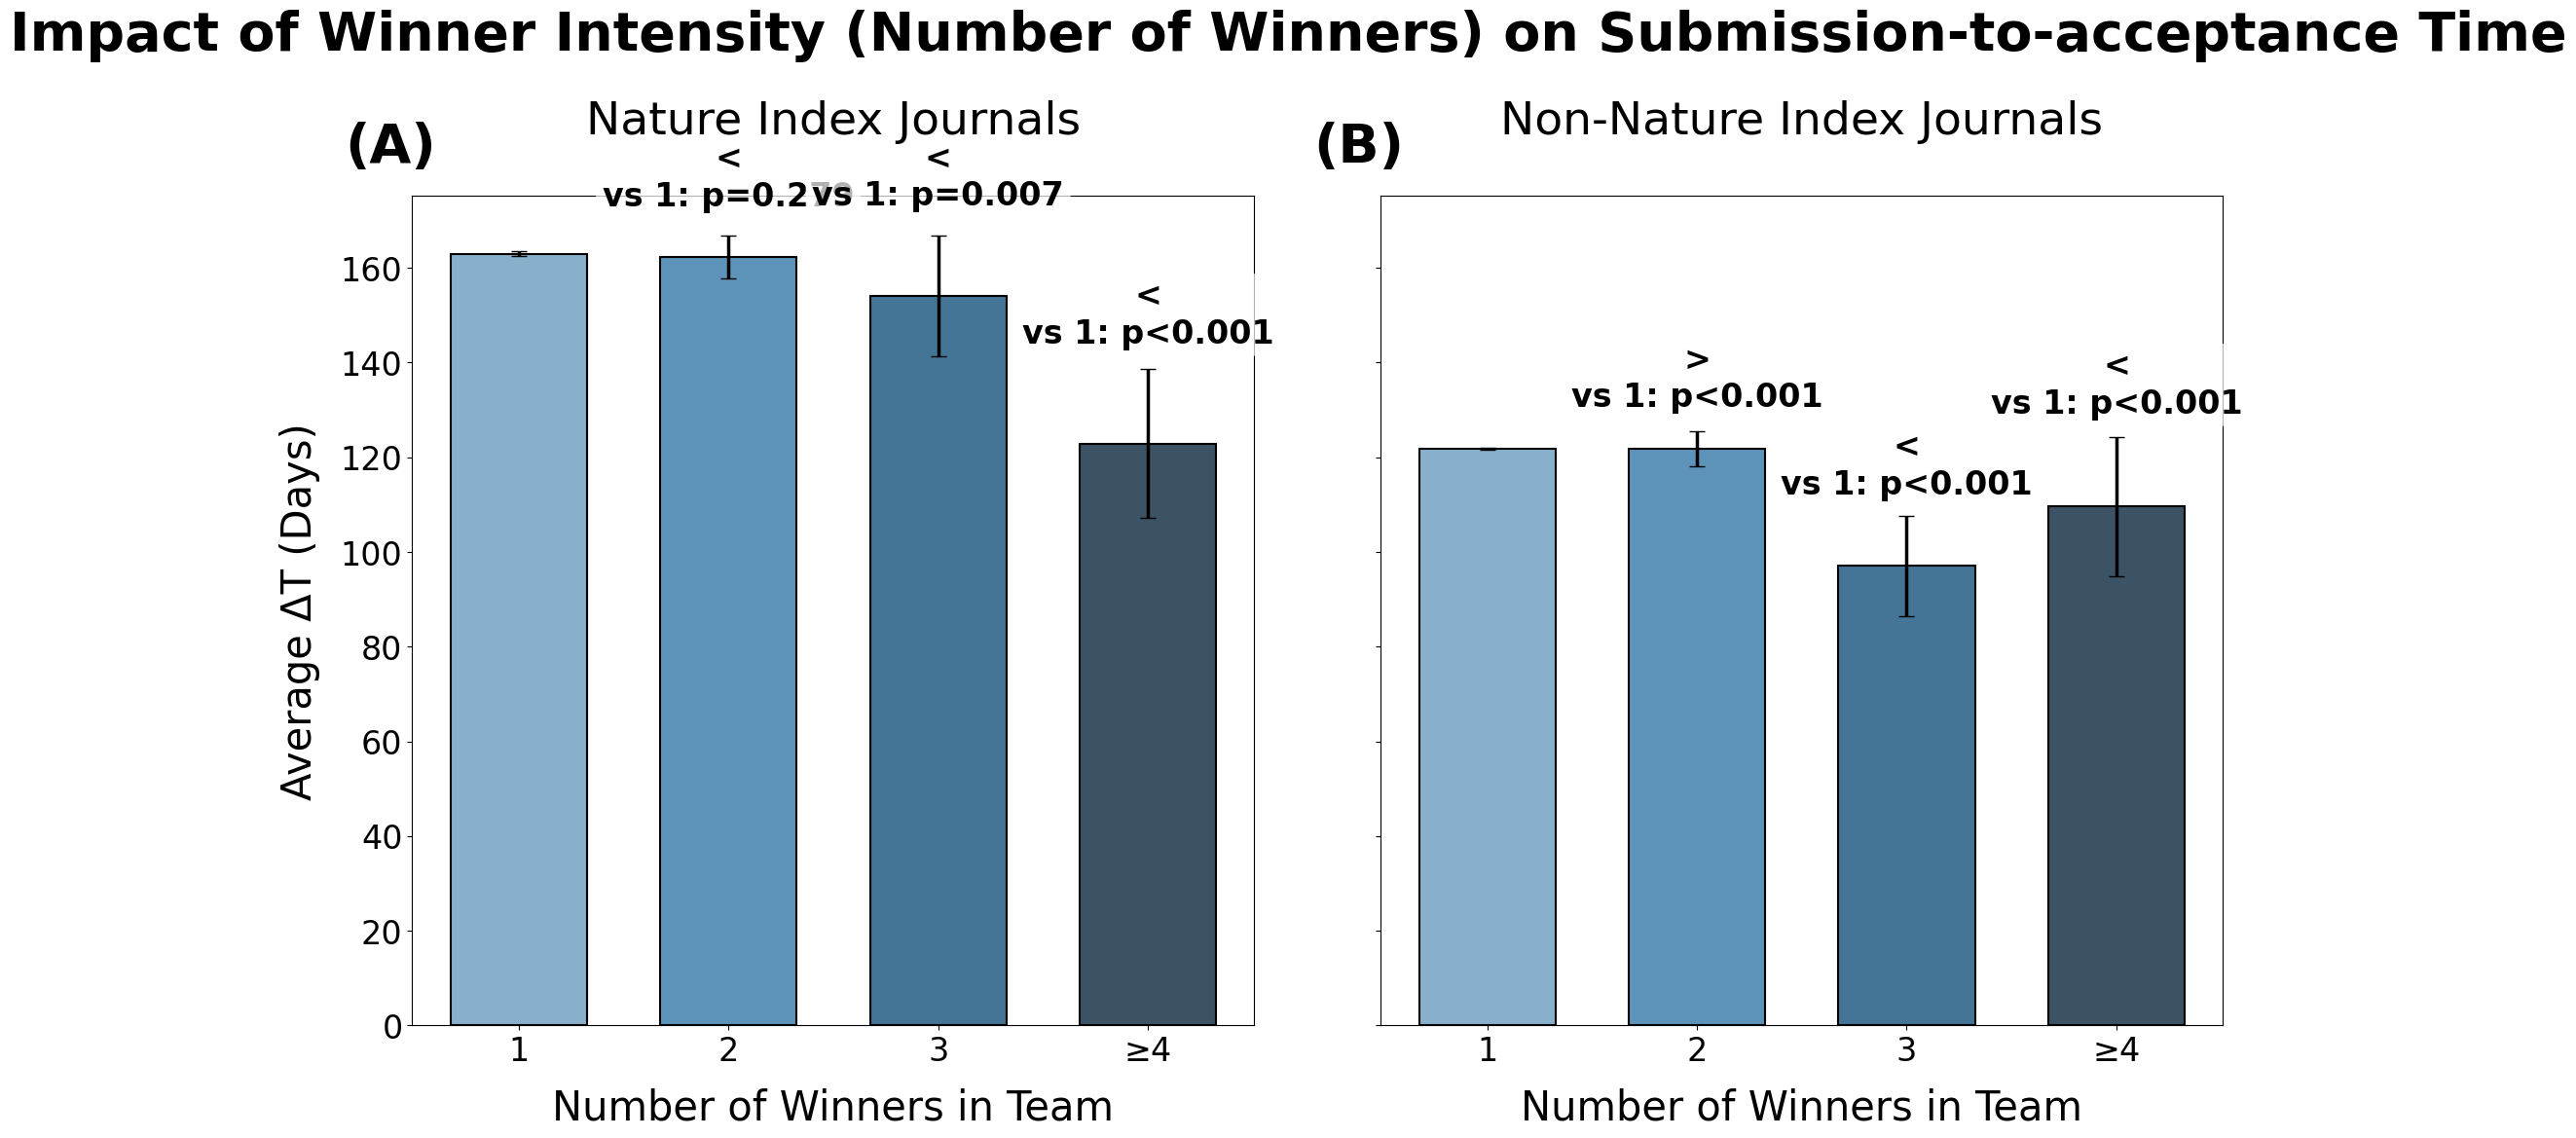

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Suppress warnings and disable LaTeX to prevent rendering errors
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = False

# -----------------------------------------------------------------------------
# 1. Configuration & Global Settings (Refined for better visibility)
# -----------------------------------------------------------------------------
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 24,                # Base font
    'axes.titlesize': 34,           # Subplot titles (increased)
    'axes.labelsize': 30,           # Axis labels (increased)
    'xtick.labelsize': 24,          # X-tick labels (increased)
    'ytick.labelsize': 24,          # Y-tick labels
    'legend.fontsize': 24,          # Legend text
    'legend.title_fontsize': 26,    # Legend title
    'figure.titlesize': 40          # Main Title (increased)
})

# -----------------------------------------------------------------------------
# 2. Data Loading and Preprocessing
# -----------------------------------------------------------------------------
# Replace with your actual file path
file_path = 'C:/Users/86156/Desktop/NTJY/final_group_pos_doipmid_puby_deltadays_field_tsize_top5_before0_after1_coauthor_wc0_natindex_fpy_aca_exp_jif_EISSN.csv'

try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found. Please ensure the file exists at: {file_path}")
    # Dummy data generation for testing code logic
    df = pd.DataFrame({
        'DeltaDays': np.random.randint(50, 200, 2000),
        'is_nature_index': np.random.choice([0, 1], 2000),
        'work_id': np.random.randint(1, 500, 2000),
        'if_winner': np.random.choice([0, 1], 2000),
        # Simulating raw winner counts
        'winner_count_raw': np.random.choice([1, 1, 1, 2, 2, 3, 4, 5], 2000) 
    })

# Filter valid DeltaDays
df = df[(df['DeltaDays'] > 0) & (df['DeltaDays'] <= 20000)].copy()

# Recalculate winner_count per work_id to ensure consistency
if 'work_id' in df.columns and 'if_winner' in df.columns:
    winner_counts = df.groupby('work_id')['if_winner'].transform('sum')
    df['winner_count'] = winner_counts
else:
    df['winner_count'] = df.get('winner_count', df.get('winner_count_raw', 1))

# --- NEW CATEGORIZATION: 1, 2, 3, >=4 ---
def categorize_count_new(x):
    if x <= 1: return '1'
    elif x == 2: return '2'
    elif x == 3: return '3'
    else: return '≥4'

df['WinnerCountCat'] = df['winner_count'].apply(categorize_count_new).astype('category')
order_list = ['1', '2', '3', '≥4']
df['WinnerCountCat'] = df['WinnerCountCat'].cat.set_categories(order_list, ordered=True)

# Split Nature vs Non-Nature
if 'is_nature_index' in df.columns:
    df['is_nature_index'] = df['is_nature_index'].fillna(2)
    df_nature = df[df['is_nature_index'] == 1].copy()
    df_nonnature = df[df['is_nature_index'] == 0].copy()
else:
    df_nature = df.copy()
    df_nonnature = df.copy()

# Outlier removal (Same as before)
def preprocess_data(data):
    data = data.copy()
    quantile_ranges = {'cited_by_count': 0.995, 'ref_num': 0.99, 'JIF': 0.99, 'JIF5Years': 0.99}
    for col, q in quantile_ranges.items():
        if col in data.columns:
            data = data[data[col] < data[col].quantile(q)]
    return data

df_nature = preprocess_data(df_nature)
df_nonnature = preprocess_data(df_nonnature)

# -----------------------------------------------------------------------------
# 3. Calculation of Differences (For the Response Letter)
# -----------------------------------------------------------------------------
def print_differences(data, name):
    print(f"\n--- Analysis for {name} ---")
    grouped = data.groupby('WinnerCountCat')['DeltaDays'].mean()
    base = grouped['1']
    print(f"Mean DeltaDays (1 Winner): {base:.2f}")
    for cat in ['2', '3', '≥4']:
        val = grouped[cat]
        diff = base - val
        print(f"Mean DeltaDays ({cat} Winners): {val:.2f} (Reduction: {diff:.2f} days)")

print_differences(df_nature, "Nature Index Journals")
print_differences(df_nonnature, "Non-Nature Index Journals")

# -----------------------------------------------------------------------------
# 4. Plotting
# -----------------------------------------------------------------------------
def ci95(x):
    n = x.count()
    if n <= 1: return np.nan
    sem = stats.sem(x, nan_policy='omit')
    t_val = stats.t.ppf(1 - 0.025, n - 1)
    return sem * t_val

# Use a cool-toned palette, deepening with intensity
palette = sns.color_palette("Blues_d", 4) 

fig, axes = plt.subplots(1, 2, figsize=(24, 12), sharey=True)

# Adjust layout to give space for the big title
plt.subplots_adjust(top=0.82, wspace=0.15) 
fig.suptitle("Impact of Winner Intensity (Number of Winners) on Submission-to-acceptance Time", 
             fontsize=40, y=0.98, fontweight='bold')

def draw_panel(data, ax, title, letter):
    # Aggregation
    grouped = (
        data.groupby('WinnerCountCat')['DeltaDays']
        .agg(mean='mean', ci=lambda x: ci95(x))
        .reset_index()
    )
    
    # Barplot
    sns.barplot(
        x='WinnerCountCat', y='mean',
        data=grouped, ax=ax,
        order=order_list,
        palette=palette, ci=None,
        width=0.65, edgecolor='black', linewidth=1.5
    )

    # Error Bars & P-values
    baseline_cat = '1'
    baseline_data = data[data['WinnerCountCat'] == baseline_cat]['DeltaDays']
    baseline_mean = grouped[grouped['WinnerCountCat'] == baseline_cat]['mean'].values[0]
    
    xt = ax.get_xticks()
    
    for i, cat in enumerate(order_list):
        row = grouped[grouped['WinnerCountCat'] == cat]
        if row.empty: continue
        mean_val = row['mean'].values[0]
        ci_val = row['ci'].values[0]
        
        # Manual Error Bar
        ax.errorbar(x=xt[i], y=mean_val, yerr=ci_val, fmt='none', c='black', capsize=6, elinewidth=2.5)

        # Annotations (Skip baseline)
        if cat != baseline_cat:
            target_data = data[data['WinnerCountCat'] == cat]['DeltaDays']
            
            # T-test (less = faster?)
            stat, p = stats.ttest_ind(
                np.log(target_data), 
                np.log(baseline_data), 
                alternative='less', nan_policy='omit'
            )
            
            symbol = '<' if mean_val < baseline_mean else '>'
            
            # Text Formatting
            if p < 0.001:
                p_str = "p<0.001"
            else:
                p_str = f"p={p:.3f}"
            
            # Dynamic height adjustment to avoid overlap with bar/error bar
            y_max = mean_val + ci_val
            
            # Text annotation
            ax.text(
                xt[i], y_max * 1.03, # Slightly higher
                f"{symbol}\nvs 1: {p_str}",
                ha='center', va='bottom',
                fontsize=24, fontweight='bold', # Increased font weight
                bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7, edgecolor='none')
            )

    # Panel Label
    ax.text(-0.08, 1.09, f'({letter})', transform=ax.transAxes, 
            fontsize=40, fontweight='bold', va='top')
    
    # Title & Labels
    ax.set_title(title, fontsize=34, pad=28, y=1.03) # Increased pad
    ax.set_xlabel("Number of Winners in Team", fontsize=30, labelpad=15)
    
    if letter == 'A':
        ax.set_ylabel('Average ΔT (Days)', fontsize=30, labelpad=15)
    else:
        ax.set_ylabel('')

# Draw
draw_panel(df_nature, axes[0], "Nature Index Journals", "A")
draw_panel(df_nonnature, axes[1], "Non-Nature Index Journals", "B")

# Save
plt.savefig("Figure_S12_WinnerIntensity.png", dpi=800, bbox_inches='tight')
plt.show()

# List of Prizes

In [2]:
import pandas as pd

dfaward = pd.read_csv('../../../winners_first_awards_info_1128_v2.csv')

In [3]:
dfaward

,Unnamed: 0,item,awardYear,magid,author_id,awardLabel,name,pageview,is_top5
0,0,Q1003857,2011.0,2243805330,A2243805330,The Brain Prize,The Brain Prize,252.500000,0
1,1,Q15109532,2012.0,2249366762,A2249366762,The Brain Prize,The Brain Prize,252.500000,0
2,2,Q543380,2014.0,126417355,A126417355,The Brain Prize,The Brain Prize,252.500000,0
3,3,Q7173587,2017.0,2057359516,A2057359516,The Brain Prize,The Brain Prize,252.500000,0
4,4,Q100392,1994.0,2079478239,A2079478239,Gay-Lussac-Humboldt-Prize,Gay-Lussac-Humboldt-Prize,85.200000,0
...,...,...,...,...,...,...,...,...,...
4431,4431,Q80910,2007.0,2154399230,A2154399230,Albany Medical Center Prize,Albany Medical Center Prize,352.100000,0
4432,4432,Q93052,1976.0,2462451481,A2462451481,Claude E. Shannon Award,Claude E. Shannon Award,899.766667,1
4433,4433,Q19597055,2008.0,633417351,A633417351,APA Award for Lifetime Contributions to Psycho...,APA Award for Lifetime Contributions to Psycho...,206.518519,0
4434,4434,Q200101,1956.0,1996250867,A1996250867,Lasker Award,Lasker Award,3135.166667,1


In [6]:
unique_awards = dfaward['name'].dropna().unique()
awards_string = ', '.join(sorted(unique_awards))
print(awards_string)

ACS Award in pure chemistry, APA Award for Distinguished Scientific Contributions to Psychology, APA Award for Lifetime Contributions to Psychology, ASME Medal, Abel Prize, Acharius Medal, Adams Prize, Alan T. Waterman Award, Albany Medical Center Prize, Albert Einstein Award, Albert Einstein Medal, Albert Einstein World Award of Science, Albert Lasker Award for Basic Medical Research, Albert Medal, Alfred P. Sloan, Jr. Prize, Alfred Stock Memorial Prize, American Chemical Society Award for Creative Work in Synthetic Organic Chemistry, American Chemical Society Award in Inorganic Chemistry, American Chemical Society Award in Organometallic Chemistry, Annual Review Prize Lecture, Arthur C. Cope Award, Arthur L. Day Medal, Arthur L. Day Prize and Lectureship, Arthur L. Schawlow Prize in Laser Science, Asahi Prize, Balzan Prize, Benjamin Franklin Medal, Bigsby Medal, Boltzmann Medal, Breakthrough Prize in Fundamental Physics Prize, Breakthrough Prize in Life Sciences, Breakthrough Prize i

In [7]:
print(len(unique_awards))

287


In [9]:
dft5=dfaward[dfaward['is_top5']==1]

In [10]:
dft5

,Unnamed: 0,item,awardYear,magid,author_id,awardLabel,name,pageview,is_top5
209,209,Q102250,2003.0,2439945719,A2439945719,Nobel Prize in Chemistry,Nobel Prize in Chemistry,16881.033333,1
210,210,Q102822,1901.0,2580446109,A2580446109,Nobel Prize in Chemistry,Nobel Prize in Chemistry,16881.033333,1
211,211,Q102830,1921.0,1573439443,A1573439443,Nobel Prize in Chemistry,Nobel Prize in Chemistry,16881.033333,1
212,212,Q106471,2010.0,2105838839,A2105838839,Nobel Prize in Chemistry,Nobel Prize in Chemistry,16881.033333,1
213,213,Q106733,1985.0,2283536144,A2283536144,Nobel Prize in Chemistry,Nobel Prize in Chemistry,16881.033333,1
...,...,...,...,...,...,...,...,...,...
4420,4420,Q511621,1914.0,2112449390,A2112449390,Davy Medal,Davy Medal,1400.166667,1
4421,4421,Q708668,1972.0,1944081239,A1944081239,Davy Medal,Davy Medal,1400.166667,1
4432,4432,Q93052,1976.0,2462451481,A2462451481,Claude E. Shannon Award,Claude E. Shannon Award,899.766667,1
4434,4434,Q200101,1956.0,1996250867,A1996250867,Lasker Award,Lasker Award,3135.166667,1


In [11]:
uni5 = dft5['name'].dropna().unique()
uni5_string = ', '.join(sorted(uni5))
print(uni5_string)

Abel Prize, Albert Einstein Award, Bigsby Medal, Breakthrough Prize in Life Sciences, Breakthrough Prize in Mathematics, Claude E. Shannon Award, Copley Medal, Cullum Geographical Medal, Davy Medal, Edison Medal, Fellow of the Royal Society, Fields Medal, Hoover Medal, Hughes Medal, Lasker Award, Lasker-DeBakey Clinical Medical Research Award, Lyell Medal, MacArthur Fellowship, Marconi Prize, Max Planck Medal, National Medal of Science, Nobel Prize in Chemistry, Nobel Prize in Physics, Nobel Prize in Physiology or Medicine, Priestley Medal, SASTRA Ramanujan Prize, Shanti Swarup Bhatnagar Prize for Science and Technology, Turing Award, Vautrin Lud Prize, Wolf Prize in Chemistry, Wolf Prize in Mathematics, Wolf Prize in Medicine, Wolf Prize in Physics, Wollaston Medal


In [12]:
print(len(uni5))

34
